In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import skew, kurtosis

import warnings

warnings.filterwarnings(action = 'ignore')

## 1. 데이터 입력

### 1.1 행정동, 밀도 데이터 로드 및 병합

In [2]:
tmp_df = pd.read_csv('../data/행정동_최종ver.csv')
pd.set_option('display.max_columns',35)
# tmp_df
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [3]:
tmp_df.rename(columns={'MZ_POP_CNT':'MZ_NUM'},inplace=True)
tmp_df.rename(columns={'VEGAN_CNT':'VEGAN_NUM'},inplace=True)
tmp_df

,GU,DONG,DONG_CODE,ACADEMY_NUM,KINDER_NUM,FIRE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,CCTV_NUM,POLICE_NUM,BIKE_NUM,CAR_SHR_NUM,SUBWAY_NUM,SAFE_DLVR_NUM,DPTM_NUM,ANI_HSPT_NUM,...,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,CON_NUM,NOISE_VIBRATION_NUM,CHILD_MED_NUM,CAFE_NUM,PARK_NUM,HOSPITAL_NUM,BUS_CNT,VEGAN_NUM,RETAIL_NUM,COLIVING_NUM,MZ_NUM
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,18.000000,0.000000,1.0,2.000000,2.000000,3.0,56.666667,2.000000,5.666667,1.000000,0.333333,1.000000,0.0,2.000000,...,0.000000,0.0,0.0,0.000000,0.333333,0.0,4.000000,18816.000000,7.333333,39.666667,1.666667,11.666667,14.0,5.000000,0.000000,0.0,3210
1,종로구,사직동,1111053000,19.000000,10.000000,0.0,2.000000,0.000000,0.0,41.666667,3.000000,11.666667,5.000000,1.333333,0.000000,0.0,1.000000,...,0.000000,0.0,18.0,3.000000,7.333333,0.0,20.000000,22848.000000,10.333333,100.666667,2.666667,74.666667,16.0,8.000000,2.000000,1.0,2749
2,종로구,삼청동,1111054000,2.000000,10.000000,0.0,0.000000,1.000000,1.0,22.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,1.0,3.0,0.000000,1.000000,0.0,2.000000,14112.000000,1.000000,52.000000,1.000000,7.000000,11.0,6.000000,0.000000,0.0,684
3,종로구,부암동,1111055000,24.000000,0.000000,1.0,4.000000,1.000000,1.0,41.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.0,3.000000,...,0.000000,0.0,2.0,2.000000,0.000000,0.0,8.000000,6048.000000,5.000000,30.000000,1.000000,4.000000,9.0,1.000000,0.000000,0.0,2585
4,종로구,평창동,1111056000,28.000000,0.000000,0.0,0.000000,0.000000,1.0,21.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,5.0,5.000000,1.000000,0.0,6.000000,4032.000000,10.000000,36.000000,0.000000,14.000000,37.0,2.000000,0.000000,0.0,4597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,...,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,11.0,2.333333,3.333333,0.0,8130
422,강동구,성내3동,1174066000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,...,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,9.0,2.333333,3.333333,0.0,7120
423,강동구,길동,1174068500,100.000000,20.000000,1.0,6.000000,1.000000,0.0,119.000000,0.000000,9.000000,10.000000,1.000000,1.000000,0.0,8.000000,...,1.000000,0.0,18.0,9.000000,2.000000,0.0,76.000000,4327.000000,10.000000,63.000000,1.000000,120.000000,28.0,1.000000,8.000000,0.0,14486


In [4]:
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'VEGAN_NUM', 'RETAIL_NUM', 'COLIVING_NUM',
       'MZ_NUM'],
      dtype='object')

In [5]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


### 1.2 피처 별 가중치 부여 및 통합

### 분류 가중치 비율
- 교통 : 자전거 : 버스 : 지하철 = 0.06 : 0.93 : 1
- 치안 : 안심택배 제외 나머지 합산
- 건강 : 병원 : 약국 = 0.94 : 0.06
- 편의 :
- 교육 : 공교육(초,중,고) : 사교육(학원) = 1(0.9 : 0.07 : 0.03) : 0.7
- 육아 : 합산

In [6]:
# 행정동 데이터, 밀도 데이터 병합
tmp_df = tmp_df.set_index(['GU','DONG'])
density_df = density_df.set_index(['GU','DONG'])
temp = tmp_df.join(density_df)
tmp = temp.reset_index()

In [7]:
# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','SAFE_DLVR_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM','VEGAN_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,...,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,2.000000,1.0,56.666667,11.666667,4.333333,0.0,0.000000,4.000000,...,18.000000,0.000000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000,5.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,3.000000,0.0,41.666667,74.666667,17.333333,0.0,2.000000,20.000000,...,19.000000,10.000000,10.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,0.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000,8.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,1.000000,0.0,22.000000,7.000000,2.000000,0.0,0.000000,2.000000,...,2.000000,10.000000,1.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000,6.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,1.000000,1.0,41.000000,4.000000,1.000000,0.0,0.000000,8.000000,...,24.000000,0.000000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000,1.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,1.000000,0.0,21.000000,14.000000,5.000000,0.0,0.000000,6.000000,...,28.000000,0.000000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,63.333333,16.666667,4.000000,8130,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667,2.333333
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,63.333333,16.666667,4.000000,7120,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667,2.333333
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,0.000000,1.0,119.000000,120.000000,35.000000,0.0,8.000000,76.000000,...,100.000000,20.000000,10.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,1.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000,1.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,1.000000,0.0,32.500000,14.500000,10.000000,0.0,0.000000,17.000000,...,38.000000,0.000000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,0.000000,0.0,4.0,3.000000,2.000000,1.500000,0.500000


In [8]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,...,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.377934,53.603286,42.293427,12.169014,0.063380,2.995305,27.239437,37.985915,2.838028,...,57.737089,21.572770,14.323944,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,0.622066,1.194836,0.166667,7.448357,3.626761,4.133803,2.093897,3.929577
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.568790,41.087587,35.024099,7.266001,0.207678,2.904085,19.771517,37.562957,1.465365,...,56.280168,18.688217,14.060665,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,0.503566,1.606980,0.567719,7.034213,4.318573,3.156750,1.393441,4.372210
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,4.333333,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,25.946429,23.500000,8.000000,0.000000,1.333333,17.714286,19.541667,2.000000,...,27.090909,10.000000,4.381250,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,0.000000,0.000000,3.500000,1.333333,2.285714,1.350000,1.500000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.200000,41.375000,34.500000,11.000000,0.000000,2.400000,22.500000,27.363636,2.400000,...,41.166667,20.000000,10.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.666667,0.833333,0.000000,6.000000,2.500000,3.500000,2.000000,3.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,0.500000,65.731250,48.000000,14.000000,0.000000,4.000000,29.333333,39.250000,3.600000,...,70.000000,30.000000,18.000000,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.000000,1.750000,0.000000,9.000000,4.500000,5.000000,2.500000,4.666667
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,4.000000,251.000000,255.000000,50.000000,1.500000,28.000000,170.000000,274.000000,10.000000,...,480.250000,170.000000,101.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,3.500000,15.000000,5.000000,60.000000,32.500000,24.000000,12.000000,40.000000


In [9]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [10]:
tmp.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'SUBWAY_NUM',
       'BUS_CNT', 'BIKE_NUM', 'POLICE_NUM', 'FIRE_NUM', 'CCTV_NUM',
       'HOSPITAL_NUM', 'PHARM_NUM', 'DPTM_NUM', 'RETAIL_NUM', 'CON_NUM',
       'CAFE_NUM', 'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'ACADEMY_NUM',
       'KINDER_NUM', 'CHILD_MED_NUM', 'MZ_NUM', 'COLIVING_NUM', 'KIDS_NUM',
       'STARBUCKS_NUM', 'MC_NUM', 'NOISE_VIBRATION_NUM', 'SAFE_DLVR_NUM',
       'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM',
       'VEGAN_NUM'],
      dtype='object')

In [11]:
# 피처 통합 함수
def assembling_features(df, weight, name): # 피처들로 구성된 데이터프레임, 피처별 가중치, 새로 생성할 피처의 이름
    columns = df.columns
    values = df[columns].values.tolist()
    sums = []
    
    for i in range(len(df)):
        sigma = 0
        for k in range(len(values[i])):
            sigma += values[i][k] * weight[k]
        sums.append(sigma)
    sum_df = pd.DataFrame(sums,columns=[name])
    return sum_df

In [12]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','FIRE_NUM','CCTV_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]
# 각 묶어지는 컬럼 별 가중치 list
weight_list = [[1,0.93,0.06],[1,1,1],[0.94,0.06],[0.04,0.27,0.44,0.25],[0.9,0.07,0.03,0.7],[1,1]]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVENIENCE','EDUCATION','PARENTING']

In [13]:
# 큰 카테고리로 묶는 함수
def assembling(df, sum_list, weight_list, name_list): 
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        tmp_df = df[sum_list[j]]
        name = name_list[j]
        w = weight_list[j]
        sum_df = assembling_features(tmp_df,w,name)

        tmp_df[name_list[j]] = sum_df.values
        tmp_df = tmp_df.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(tmp_df)
    del(df_tmp[0])
    return df_tmp

In [14]:
# 컬럼 끼리 더한 데이터
asmb_df = assembling(tmp,sum_list,weight_list,name_list)
asmb_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING
0,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333
1,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333
2,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000
3,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000
4,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000
...,...,...,...,...,...,...
421,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667
422,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667
423,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000
424,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000


In [15]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df, asmb_df, sum_list, name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE','POP','AREA','DENSITY'] + name_list +['MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM','VEGAN_NUM']
    df = df[column_list]
    return df

In [16]:
tmp_df = data_frame_redirect(tmp, asmb_df, sum_list, name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'TRANSPORT',
       'SECURITY', 'HEALTH', 'CONVENIENCE', 'EDUCATION', 'PARENTING', 'MZ_NUM',
       'COLIVING_NUM', 'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM',
       'CAR_SHR_NUM', 'ANI_HSPT_NUM', 'VEGAN_NUM'],
      dtype='object')

In [17]:
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.000000,1.000000,2.000000,5.000000
1,종로구,사직동,1111053000,9636,1.23,7834,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,1.000000,18.0,3.000000,5.000000,1.000000,8.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,3.0,0.000000,1.000000,0.000000,6.000000
3,종로구,부암동,1111055000,9782,2.27,4309,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,2.0,2.000000,5.000000,3.000000,1.000000
4,종로구,평창동,1111056000,18329,8.87,2066,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,5.0,5.000000,0.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667,8130,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667,2.333333
422,강동구,성내3동,1174066000,23346,0.71,32882,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667,7120,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667,2.333333
423,강동구,길동,1174068500,45973,2.17,21186,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,3.000000,18.0,9.000000,10.000000,8.000000,1.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,4.0,3.000000,2.000000,1.500000,0.500000


In [18]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,15.812629,54.546948,40.485962,22.293099,43.064977,35.896714,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,1.194836,7.448357,3.626761,4.133803,2.093897,3.929577
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.637535,41.269881,33.313301,17.783109,39.861247,25.925220,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,1.606980,7.034213,4.318573,3.156750,1.393441,4.372210
min,1.111052e+09,144.000000,0.230000,157.000000,2.070000,4.333333,1.000000,1.431667,0.700000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.540000,26.589286,22.480000,13.440833,20.842727,16.750000,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,3.500000,1.333333,2.285714,1.350000,1.500000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.497000,42.750000,33.070000,17.945000,31.662500,30.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.833333,6.000000,2.500000,3.500000,2.000000,3.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,19.942500,67.075000,46.221000,23.131500,52.250000,48.187500,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.750000,9.000000,4.500000,5.000000,2.500000,4.666667
max,1.174070e+09,56012.000000,12.680000,55657.000000,73.811818,252.500000,242.700000,135.775000,342.280000,207.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,15.000000,60.000000,32.500000,24.000000,12.000000,40.000000


### 1.3 면적 당 수치 계산

In [19]:
area = tmp_df['AREA']

In [20]:
columns = tmp_df.columns[6:]

In [21]:
for i in range(len(area)):
    for column in columns:
        tmp_df[column][i] = tmp_df[column][i] / area[i]
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,7321.400778,0.389105,0.000000,0.000000,0.389105,0.778210,1.945525
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,18575.609756,0.813008,14.634146,2.439024,4.065041,0.813008,6.504065
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,9471.140940,0.000000,2.013423,0.000000,0.671141,0.000000,4.026846
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,2664.317181,0.000000,0.881057,0.881057,2.202643,1.321586,0.440529
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,454.565953,0.000000,0.563698,0.563698,0.000000,0.000000,0.225479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,2152.736318,2.487562,14.925373,6.965174,9.950249,3.980100,3.482587
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,2031.455399,2.347418,14.084507,6.572770,9.389671,3.755869,3.286385
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1994.009217,1.382488,8.294931,4.147465,4.608295,3.686636,0.460829
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,2351.630435,0.000000,4.347826,3.260870,2.173913,1.630435,0.543478


In [22]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,14.899219,56.413573,40.203343,21.706931,42.454016,36.996223,7109.301320,0.166431,0.498434,1.159477,0.188286,2254.690189,1.223275,7.136976,3.344890,4.052260,2.152990,3.673772
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.722790,50.615331,28.324127,14.839065,42.415614,28.662723,3922.924848,0.582447,0.632681,1.733016,0.305553,3915.731918,1.647054,5.813202,3.367516,2.819812,1.543945,3.567198
min,1.111052e+09,144.000000,0.230000,157.000000,1.402529,1.104101,0.357143,1.037855,1.006711,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,22.375445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.331860,23.515357,19.444727,11.931636,19.589909,15.043297,4088.947368,0.000000,0.000000,0.238595,0.000000,425.640244,0.000000,3.012962,1.204481,1.949320,1.010498,1.491805
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.183811,43.993671,35.314432,19.422745,32.325255,31.173590,7053.872138,0.000000,0.327602,0.648668,0.000000,943.124462,0.730461,5.902233,2.443618,3.571429,1.900506,2.835965
75%,1.161306e+09,27908.250000,1.487500,31708.500000,18.691749,73.260354,52.296139,27.678636,52.244898,50.301671,9397.635294,0.000000,0.745713,1.417603,0.316456,2071.379767,1.675408,9.523810,4.289551,5.570074,2.935049,4.837127
max,1.174070e+09,56012.000000,12.680000,55657.000000,136.688552,522.500000,211.043478,118.065217,390.982877,167.705167,27574.074074,5.405405,4.000000,18.686869,3.030303,34560.000000,12.121212,39.130435,28.260870,16.956522,9.090909,36.363636


### 1.4 왜도/첨도 측정 : 일부 특성들을 범주화

#### 1.4.1 왜도/첨도 측정

In [23]:
columns = tmp_df.columns[6:]
skews = []
kurtosises = []
for column in columns:
    # 왜도 : 절댓값 3을 넘지 않아야 함
    skews.append(skew(tmp_df[column]))

    # 첨도 : 절댓값 8~10을 넘지 않아야 함
    kurtosises.append(kurtosis(tmp_df[column], fisher=True))
res = [skews,kurtosises]
standard_df = pd.DataFrame(data=res, index=['왜도','첨도'],columns=columns)

In [24]:
standard_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
왜도,5.072204,3.132583,1.547339,2.001621,4.00260,1.361778,0.685738,4.792325,1.895467,4.566057,3.144228,3.912226,2.655983,1.742896,2.604953,1.049841,1.033603,3.429052
첨도,56.811500,19.030154,4.134766,7.570355,23.55307,2.534743,1.285944,28.221618,4.395937,32.014755,18.791080,19.032090,9.877211,4.295465,10.645659,1.592107,1.487151,21.454968


In [25]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [26]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,VEGAN_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226,3.429052
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209,21.454968


In [27]:
over = []
for column in standard_df.columns:
    if((standard_df[column][1] > 8)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [28]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GOLF_NUM,VEGAN_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226,2.655983,2.604953,3.429052
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209,9.877211,10.645659,21.454968


In [29]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3) and (standard_df[column][1] > 8)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [30]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,VEGAN_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226,3.429052
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209,21.454968


In [31]:
over_std.columns

Index(['TRANSPORT', 'SECURITY', 'EDUCATION', 'COLIVING_NUM', 'STARBUCKS_NUM',
       'MC_NUM', 'NOISE_VIBRATION_NUM', 'VEGAN_NUM'],
      dtype='object', name=0)

array([[<AxesSubplot:title={'center':'DONG_CODE'}>,
        <AxesSubplot:title={'center':'POP'}>,
        <AxesSubplot:title={'center':'AREA'}>,
        <AxesSubplot:title={'center':'DENSITY'}>,
        <AxesSubplot:title={'center':'TRANSPORT'}>],
       [<AxesSubplot:title={'center':'SECURITY'}>,
        <AxesSubplot:title={'center':'HEALTH'}>,
        <AxesSubplot:title={'center':'CONVENIENCE'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PARENTING'}>],
       [<AxesSubplot:title={'center':'MZ_NUM'}>,
        <AxesSubplot:title={'center':'COLIVING_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'MC_NUM'}>],
       [<AxesSubplot:title={'center':'NOISE_VIBRATION_NUM'}>,
        <AxesSubplot:title={'center':'LEISURE_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSu

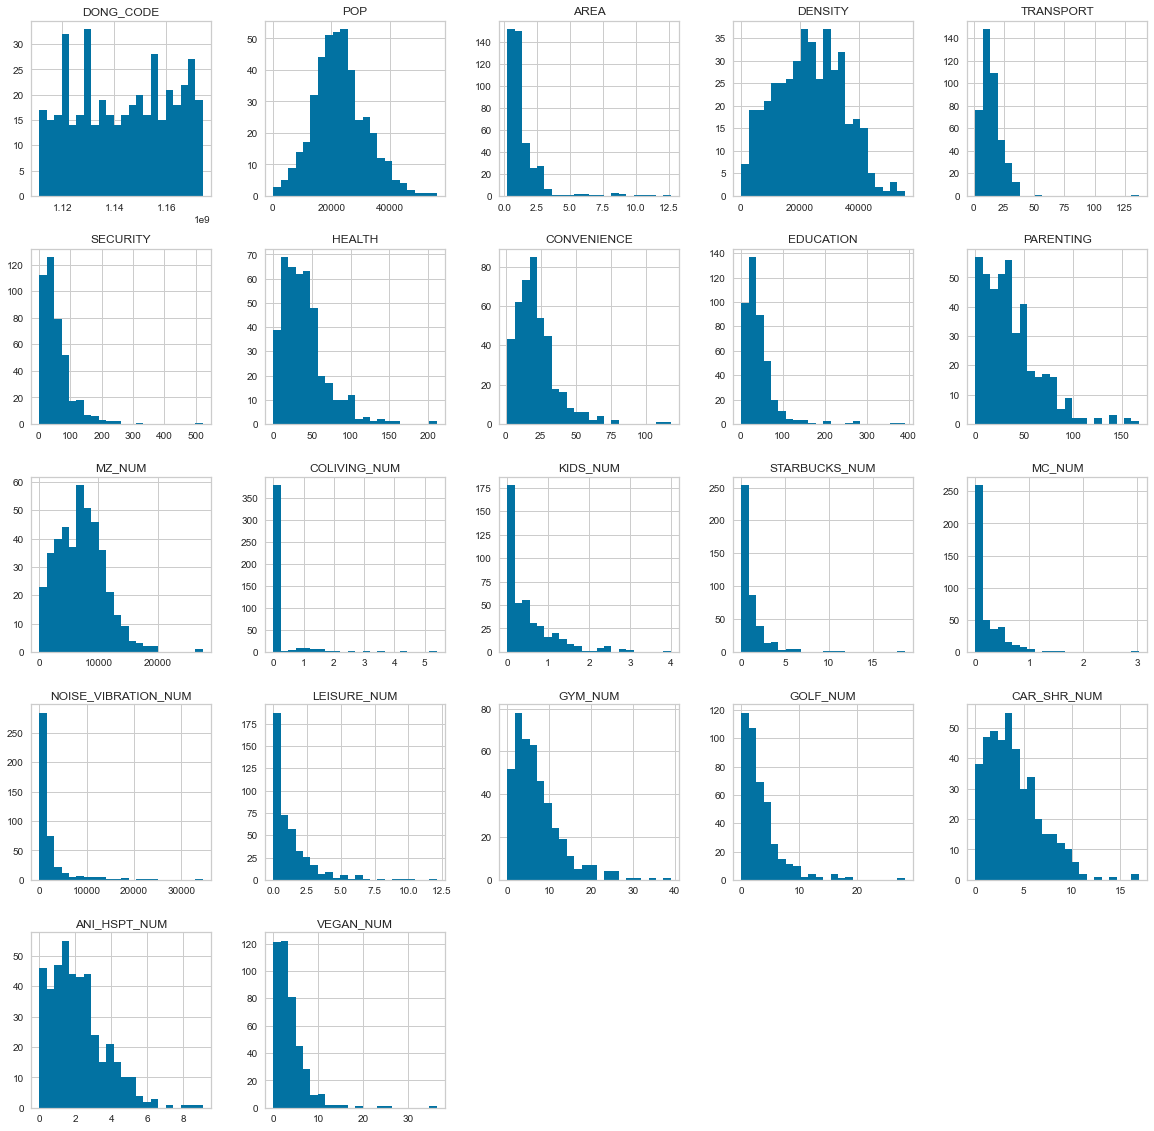

In [32]:
tmp_df.hist(figsize = (20, 20), bins = 22, legend = False)

In [33]:
origin_df = tmp_df.copy()

#### 1.4.2 최댓값 제한
- 교통
- 보안
- 교육
- 코리빙
- 스타벅스
- 맥도날드
- 소음

**교통**

<AxesSubplot:>

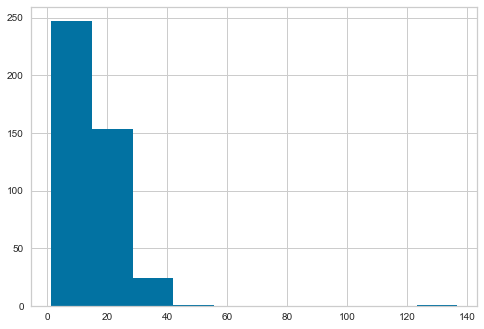

In [34]:
tmp_df['TRANSPORT'].hist()

In [35]:
tmp_df['TRANSPORT'].describe()

count    426.000000
mean      14.899219
std        9.722790
min        1.402529
25%        9.331860
50%       13.183811
75%       18.691749
max      136.688552
Name: TRANSPORT, dtype: float64

In [36]:
t = tmp_df['TRANSPORT'].quantile(0.95)
t

29.322401908801698

In [37]:
tmp_df['TRANSPORT'] = np.where(tmp_df['TRANSPORT'] > t, t, tmp_df['TRANSPORT'])

<AxesSubplot:>

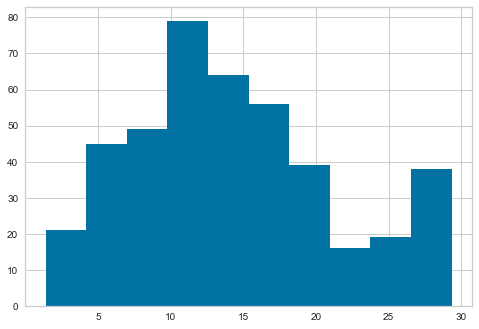

In [38]:
tmp_df['TRANSPORT'].hist()

In [39]:
tmp_df['TRANSPORT']

0       5.328145
1      13.750678
2       7.818792
3       3.819383
4       3.926719
         ...    
421    16.303483
422    12.765258
423    12.709677
424     4.945652
425    19.826531
Name: TRANSPORT, Length: 426, dtype: float64

In [40]:
tmp_df['TRANSPORT'] = np.log1p(tmp_df['TRANSPORT'])

<AxesSubplot:>

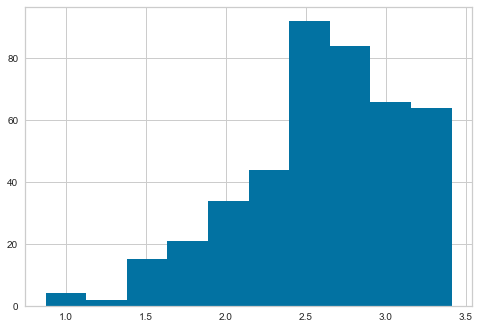

In [41]:
tmp_df['TRANSPORT'].hist()

**치안**

<AxesSubplot:>

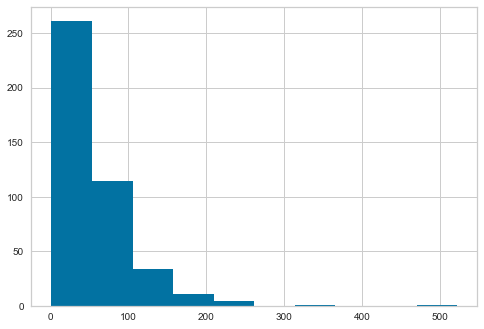

In [42]:
tmp_df['SECURITY'].hist()

In [43]:
tmp_df['SECURITY'].describe()

count    426.000000
mean      56.413573
std       50.615331
min        1.104101
25%       23.515357
50%       43.993671
75%       73.260354
max      522.500000
Name: SECURITY, dtype: float64

In [44]:
s = tmp_df['SECURITY'].quantile(0.95)
s

143.22741982936157

In [45]:
tmp_df['SECURITY'] = np.where(tmp_df['SECURITY'] > s, s, tmp_df['SECURITY'])

<AxesSubplot:>

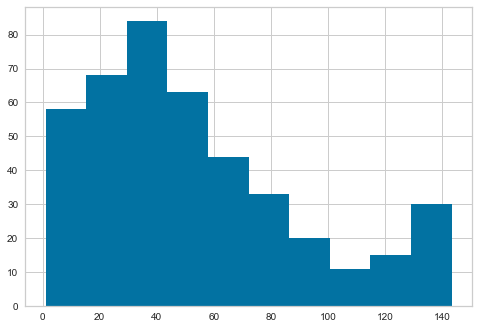

In [46]:
tmp_df['SECURITY'].hist()

In [47]:
tmp_df['SECURITY'] = np.log1p(tmp_df['SECURITY'])

<AxesSubplot:>

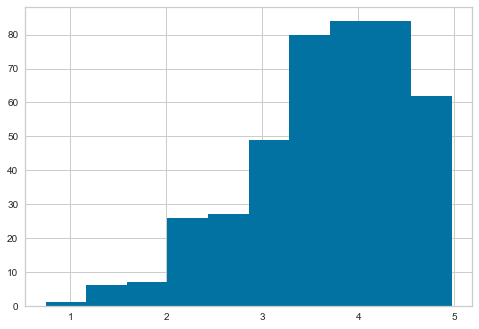

In [48]:
tmp_df['SECURITY'].hist()

**교육**

<AxesSubplot:>

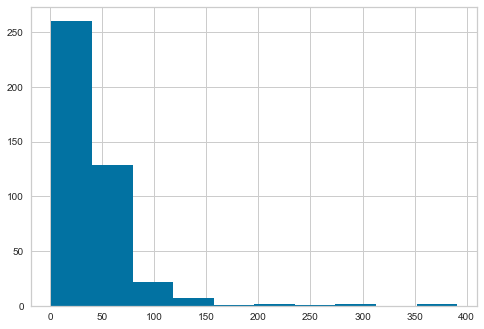

In [49]:
tmp_df['EDUCATION'].hist()

In [50]:
e = tmp_df['EDUCATION'].quantile(0.95)
e

105.6954219807904

In [51]:
tmp_df['EDUCATION'] = np.where(tmp_df['EDUCATION'] > e, e, tmp_df['EDUCATION'])

<AxesSubplot:>

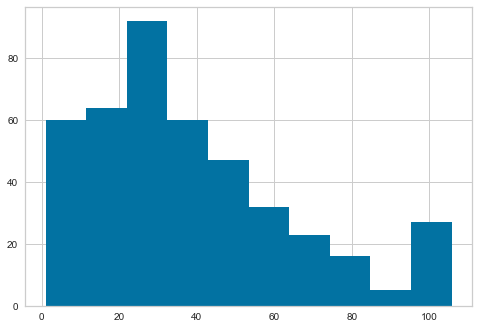

In [52]:
tmp_df['EDUCATION'].hist()

In [53]:
tmp_df['EDUCATION'] = np.log1p(tmp_df['EDUCATION'])

<AxesSubplot:>

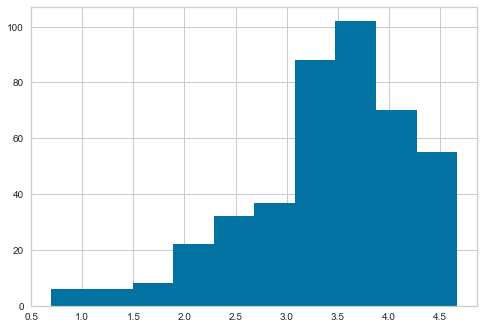

In [54]:
tmp_df['EDUCATION'].hist()

**코리빙**

<AxesSubplot:>

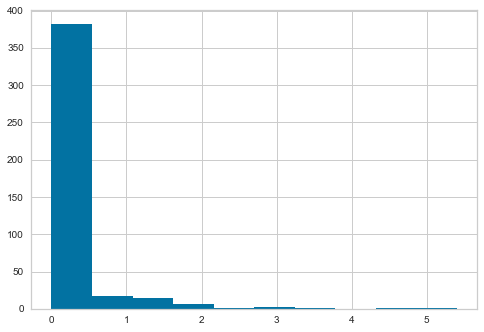

In [55]:
tmp_df['COLIVING_NUM'].hist()

In [56]:
c = tmp_df['COLIVING_NUM'].quantile(0.95)
c

1.276595744680851

In [57]:
tmp_df['COLIVING_NUM'] = np.where(tmp_df['COLIVING_NUM'] > c, c, tmp_df['COLIVING_NUM'])

<AxesSubplot:>

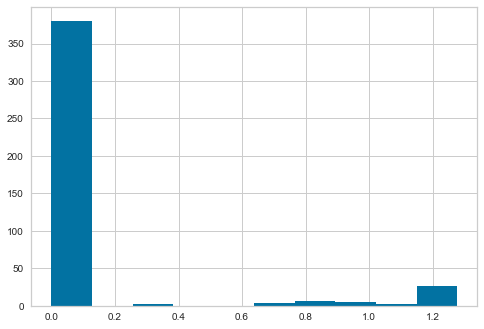

In [58]:
tmp_df['COLIVING_NUM'].hist()

In [59]:
tmp_df['COLIVING_NUM'] = np.log1p(tmp_df['COLIVING_NUM'])

<AxesSubplot:>

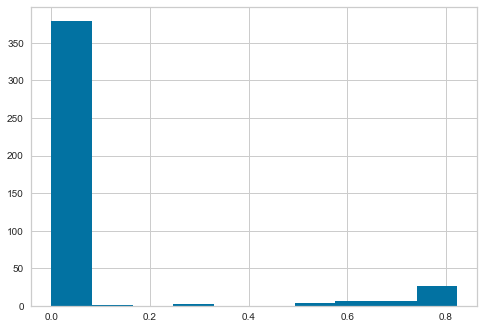

In [60]:
tmp_df['COLIVING_NUM'].hist()

**스타벅스**

<AxesSubplot:>

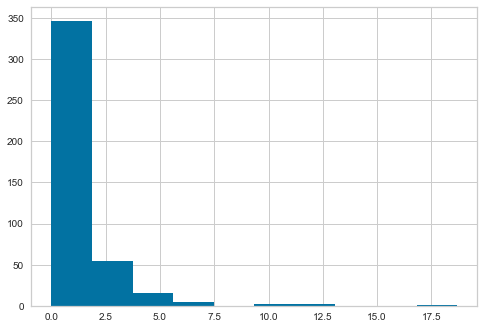

In [61]:
tmp_df['STARBUCKS_NUM'].hist()

In [62]:
star = tmp_df['STARBUCKS_NUM'].quantile(0.95)
star

3.9453748006379583

In [63]:
tmp_df['STARBUCKS_NUM'] = np.where(tmp_df['STARBUCKS_NUM'] > star, star, tmp_df['STARBUCKS_NUM'])

<AxesSubplot:>

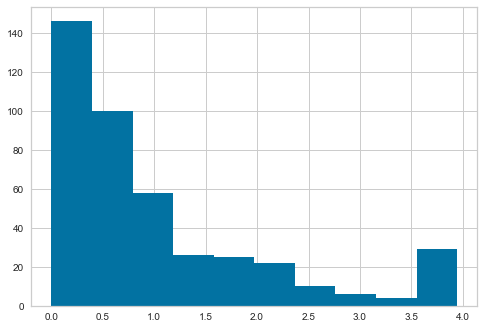

In [64]:
tmp_df['STARBUCKS_NUM'].hist()

In [65]:
tmp_df['STARBUCKS_NUM'] = np.log1p(tmp_df['STARBUCKS_NUM'])

<AxesSubplot:>

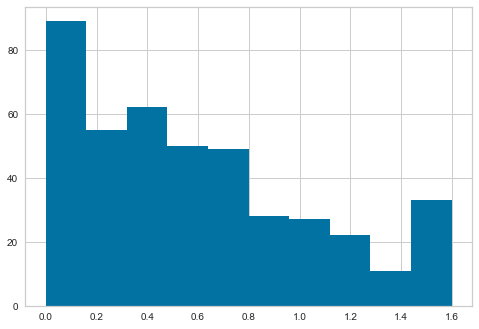

In [66]:
tmp_df['STARBUCKS_NUM'].hist()

**맥도날드**

<AxesSubplot:>

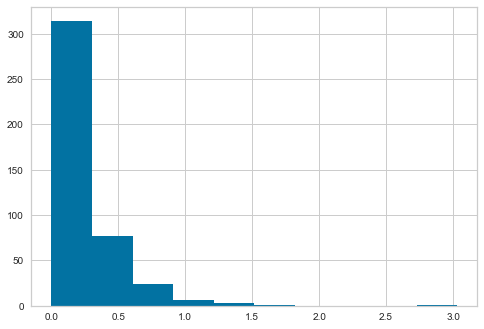

In [67]:
tmp_df['MC_NUM'].hist()

0.7782451923076923
AxesSubplot(0.125,0.125;0.775x0.755)


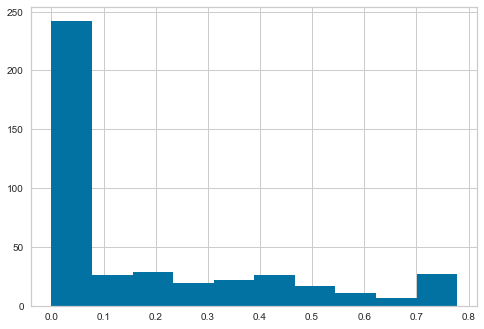

In [68]:
mc = tmp_df['MC_NUM'].quantile(0.95)
print(mc)
tmp_df['MC_NUM'] = np.where(tmp_df['MC_NUM'] > mc, mc, tmp_df['MC_NUM'])
print(tmp_df['MC_NUM'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


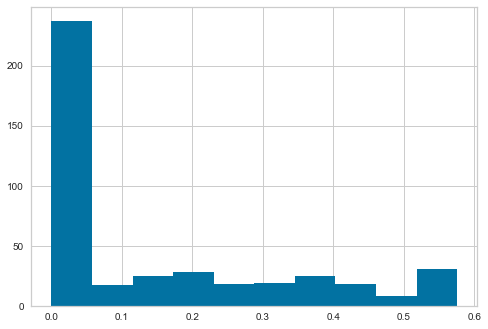

In [69]:
tmp_df['MC_NUM'] = np.log1p(tmp_df['MC_NUM'])
print(tmp_df['MC_NUM'].hist())

**소음**

<AxesSubplot:>

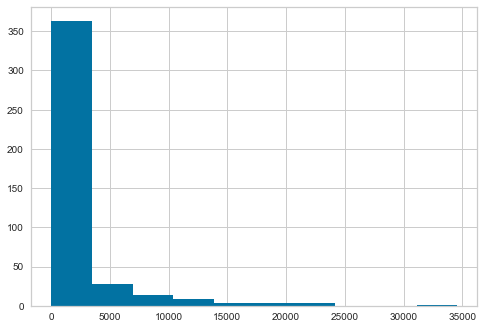

In [70]:
tmp_df['NOISE_VIBRATION_NUM'].hist()

0.7782451923076923
AxesSubplot(0.125,0.125;0.775x0.755)


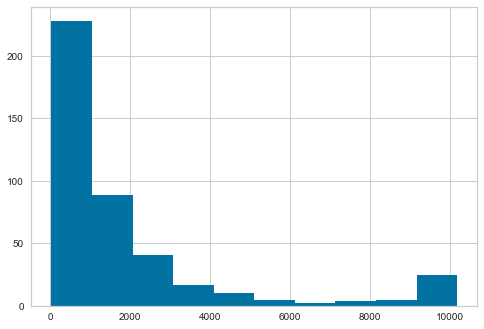

In [71]:
nv = tmp_df['NOISE_VIBRATION_NUM'].quantile(0.95)
print(mc)
tmp_df['NOISE_VIBRATION_NUM'] = np.where(tmp_df['NOISE_VIBRATION_NUM'] > nv, nv, tmp_df['NOISE_VIBRATION_NUM'])
print(tmp_df['NOISE_VIBRATION_NUM'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


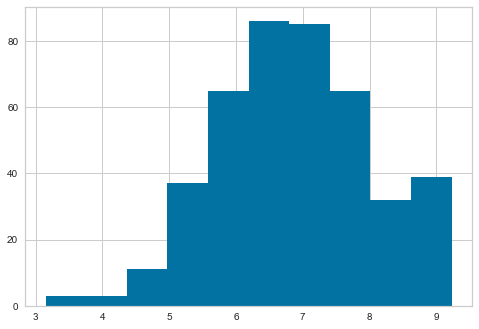

In [72]:
tmp_df['NOISE_VIBRATION_NUM'] = np.log1p(tmp_df['NOISE_VIBRATION_NUM'])
print(tmp_df['NOISE_VIBRATION_NUM'].hist())

**비건**

<AxesSubplot:>

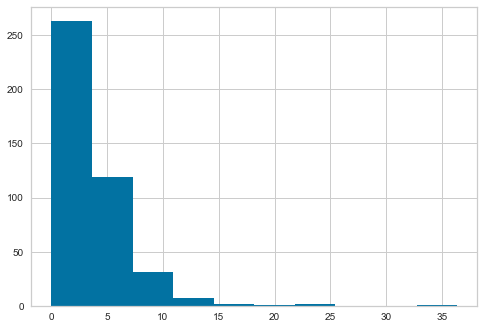

In [73]:
tmp_df['VEGAN_NUM'].hist()

In [74]:
v = tmp_df['VEGAN_NUM'].quantile(0.95)
v

9.544721998388397

In [75]:
tmp_df['VEGAN_NUM'] = np.where(tmp_df['VEGAN_NUM'] > v, v, tmp_df['VEGAN_NUM'])

<AxesSubplot:>

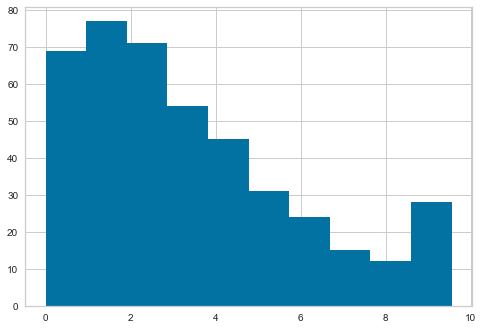

In [76]:
tmp_df['VEGAN_NUM'].hist()

In [77]:
tmp_df['VEGAN_NUM'] = np.log1p(tmp_df['VEGAN_NUM'])

<AxesSubplot:>

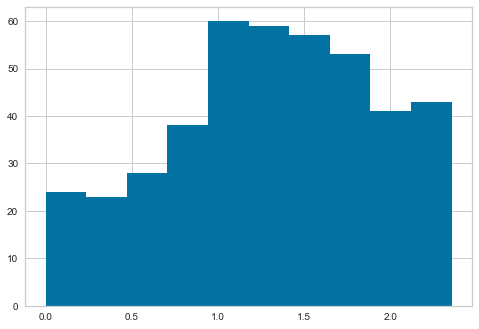

In [78]:
tmp_df['VEGAN_NUM'].hist()

**건강**

<AxesSubplot:>

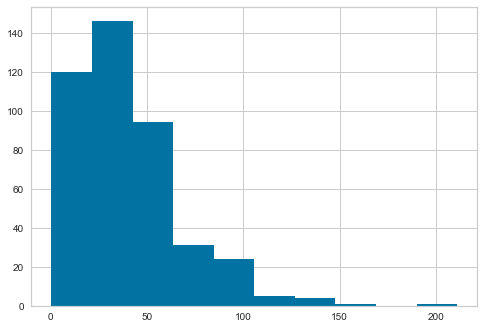

In [79]:
tmp_df['HEALTH'].hist()

96.691258111031


<AxesSubplot:>

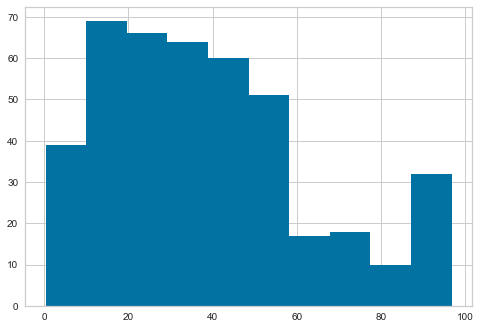

In [80]:
h = tmp_df['HEALTH'].quantile(0.95)
print(h)
tmp_df['HEALTH'] = np.where(tmp_df['HEALTH'] > h, h, tmp_df['HEALTH'])
tmp_df['HEALTH'].hist()

**편의시설**

<AxesSubplot:>

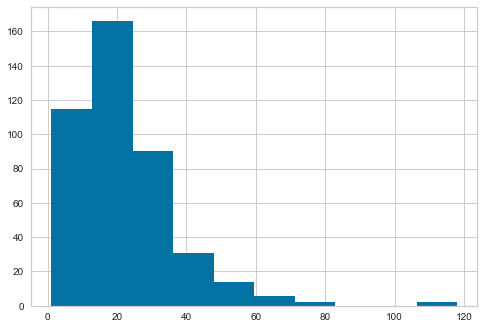

In [81]:
tmp_df['CONVENIENCE'].hist()

49.46700044121973


<AxesSubplot:>

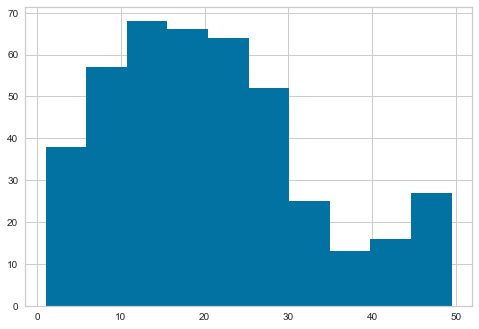

In [82]:
cv = tmp_df['CONVENIENCE'].quantile(0.95)
print(cv)
tmp_df['CONVENIENCE'] = np.where(tmp_df['CONVENIENCE'] > cv, cv, tmp_df['CONVENIENCE'])
tmp_df['CONVENIENCE'].hist()

**레저**

<AxesSubplot:>

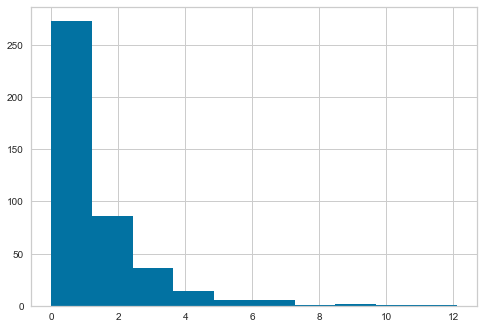

In [83]:
tmp_df['LEISURE_NUM'].hist()

4.2669172932330826


<AxesSubplot:>

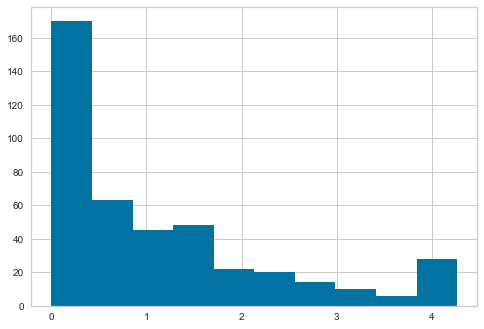

In [84]:
l = tmp_df['LEISURE_NUM'].quantile(0.95)
print(l)
tmp_df['LEISURE_NUM'] = np.where(tmp_df['LEISURE_NUM'] > l, l, tmp_df['LEISURE_NUM'])
tmp_df['LEISURE_NUM'].hist()

**골프**

<AxesSubplot:>

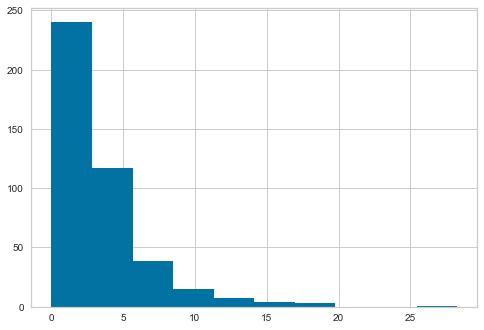

In [85]:
tmp_df['GOLF_NUM'].hist()

9.501347708894876


<AxesSubplot:>

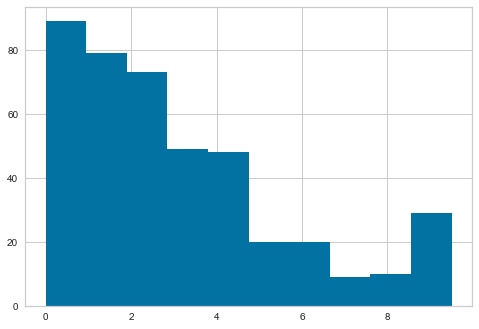

In [86]:
g = tmp_df['GOLF_NUM'].quantile(0.95)
print(g)
tmp_df['GOLF_NUM'] = np.where(tmp_df['GOLF_NUM'] > g, g, tmp_df['GOLF_NUM'])
tmp_df['GOLF_NUM'].hist()

**RobustScaling**

In [87]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,4.368353,4.543450,1.901003,2.853437,1249.027237,0.000000,0.000000,0.121954,0.000000,8.898694,0.389105,0.000000,0.000000,0.389105,0.778210,1.080287
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,57.907859,28.054201,2.585990,16.531165,2234.959350,0.594987,0.000000,1.598453,0.000000,9.227525,0.813008,14.634146,2.439024,4.065041,0.813008,2.015445
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,4.496644,9.315436,0.696497,7.382550,459.060403,0.000000,0.000000,0.513507,0.000000,9.156110,0.000000,2.013423,0.000000,0.671141,0.000000,1.614793
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,1.682819,4.854626,2.305664,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,7.888078,0.000000,0.881057,0.881057,2.202643,1.321586,0.365010
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,1.517475,1.312289,1.167229,1.127396,518.263811,0.000000,0.000000,0.106825,0.000000,6.121540,0.000000,0.563698,0.563698,0.000000,0.000000,0.203332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,84.378109,44.522388,4.234034,30.845771,12134.328358,0.000000,0.995025,1.095290,0.000000,7.674959,2.487562,14.925373,6.965174,9.950249,3.980100,1.500200
422,강동구,성내3동,1174066000,23346,0.71,32882,2.622148,4.332277,79.624413,42.014085,4.176912,29.107981,10028.169014,0.000000,0.938967,1.057073,0.000000,7.617000,2.347418,14.084507,6.572770,9.389671,3.755869,1.455444
423,강동구,길동,1174068500,45973,2.17,21186,2.618102,4.030686,52.949309,23.663594,3.577356,13.824885,6675.576037,0.000000,0.460829,0.653189,0.000000,7.598404,1.382488,8.294931,4.147465,4.608295,3.686636,0.379004
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,15.467391,12.885870,3.466245,0.000000,35.869565,0.000000,0.000000,0.000000,0.434038,7.763289,0.000000,4.347826,3.260870,2.173913,1.630435,0.434038


In [88]:
col = df.columns[6:]
data = df[col]

In [89]:
scaler = RobustScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[-1.25137342, -0.55893333, -0.94200149, ..., -0.87891199,
        -0.58314657, -0.31029508],
       [ 0.06075936, -0.16885156,  0.687746  , ...,  0.13632856,
        -0.56506546,  0.78829456],
       [-0.7368077 , -0.90860279, -0.93809629, ..., -0.80101773,
        -0.98750582,  0.31762277],
       ...,
       [-0.05271481,  0.20225405,  0.53680728, ...,  0.28636758,
         0.92807625, -1.13413682],
       [-1.34804038, -0.16646863, -0.60414574, ..., -0.38597369,
        -0.14032924, -1.06948479],
       [ 0.59557568, -0.22190083, -0.63297199, ..., -0.42273309,
        -0.19219719, -1.09508723]])

In [90]:
df[col] = df_scaled
data = df[col]

In [91]:
data

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,-1.251373,-0.558933,-0.942001,-0.944897,-1.689682,-0.803218,-1.093461,0.000000,-0.439314,-0.565210,0.000000,1.296060,-0.203745,-0.906523,-0.792079,-0.878912,-0.583147,-0.310295
1,0.060759,-0.168852,0.687746,0.548133,-0.968695,-0.415289,-0.907741,0.594987,-0.439314,1.642479,0.000000,1.504113,0.049270,1.341133,-0.001489,0.136329,-0.565065,0.788295
2,-0.736808,-0.908603,-0.938096,-0.641856,-2.957494,-0.674763,-1.242268,0.000000,-0.439314,0.020247,0.000000,1.458929,-0.435990,-0.597282,-0.792079,-0.801018,-0.987506,0.317623
3,-1.673661,-0.734128,-1.023749,-0.925136,-1.263754,-0.821676,-1.114231,0.000000,-0.439314,-0.747557,0.000000,0.656637,-0.435990,-0.771202,-0.506491,-0.378039,-0.300808,-1.150577
4,-1.639508,-2.309248,-1.028782,-1.150089,-2.462022,-0.852172,-1.231116,0.000000,-0.439314,-0.587830,0.000000,-0.461063,-0.435990,-0.819945,-0.609361,-0.986377,-0.987506,-1.340511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.308243,0.526017,1.493503,1.593932,0.765966,-0.009298,0.957008,0.000000,0.895012,0.890140,0.000000,0.521795,1.048760,1.385863,1.465626,1.761738,1.080560,0.183004
422,-0.046442,0.474366,1.348800,1.434644,0.705841,-0.058585,0.560270,0.000000,0.819839,0.832997,0.000000,0.485124,0.965113,1.256714,1.338431,1.606915,0.964050,0.130425
423,-0.052715,0.202254,0.536807,0.269312,0.074774,-0.492045,-0.071260,0.000000,0.178657,0.229103,0.000000,0.473358,0.389176,0.367494,0.552288,0.286368,0.928076,-1.134137
424,-1.348040,-0.166469,-0.604146,-0.415119,-0.042176,-0.884147,-1.321984,0.000000,-0.439314,-0.747557,1.578649,0.577682,-0.435990,-0.238741,0.264906,-0.385974,-0.140329,-1.069485


## 2. K-means 군집화

### 2.1 1차 k-means clustering

#### 2.1.1 Elbow 관측

In [92]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

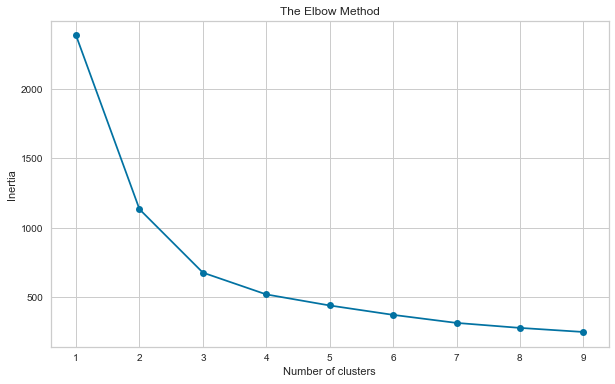

In [93]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### 2.1.2 k-means, n_cluster = 3

In [94]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [95]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225
1,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
2,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117


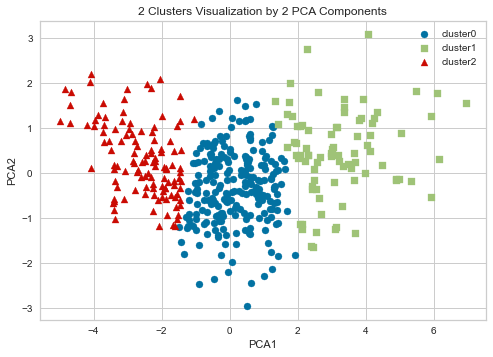

In [96]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [97]:
df[df['pca_y'] > 8] # MZ 세대가 적고, 코리빙, 스타벅스가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,km_cluster,pca_x,pca_y


In [98]:
df[df['pca_x'] > 6] # 편의 시설이 많고, 스타벅스가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,km_cluster,pca_x,pca_y
224,양천구,목3동,1147053000,21977,0.53,41466,2.941455,4.227522,96.691258,40.713208,4.669978,97.358491,13743.396226,0.0,1.886792,1.563098,0.320168,6.136667,3.018868,24.905660,9.433962,9.811321,7.924528,2.145600,1,6.103805,1.777052
320,관악구,청림동,1162054500,15214,0.30,50713,3.079869,4.828906,96.691258,49.467000,4.640788,125.555556,14490.000000,0.0,1.111111,1.278874,0.000000,6.848516,1.851852,26.296296,9.501348,12.962963,5.555556,2.355625,1,6.154576,0.314702
369,강남구,역삼2동,1168065000,36378,1.15,31633,2.738875,4.971391,96.691258,49.467000,4.669978,32.173913,8150.434783,0.0,0.869565,1.598453,0.575627,8.092452,4.266917,39.130435,9.501348,16.521739,6.521739,2.355625,1,6.940873,1.559940


In [99]:
df[df['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,km_cluster,pca_x,pca_y
count,2.250000e+02,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.0,225.000000,225.000000
mean,1.140695e+09,22372.248889,0.953956,25477.511111,2.767758,3.928499,38.926022,21.759121,3.533910,40.485409,7827.594151,0.096611,0.438807,0.584529,0.144348,7.026924,1.135090,6.377526,2.908910,4.055832,2.105914,1.413612,0.0,0.145034,-0.336450
std,1.836041e+07,8969.261997,0.450041,9001.365274,0.383521,0.590248,14.019435,7.831681,0.586530,23.891520,3084.217552,0.251522,0.483364,0.425010,0.190484,1.137074,1.125605,2.846978,1.917880,2.009031,1.099836,0.513060,0.0,0.802664,0.839830
min,1.111053e+09,1914.000000,0.230000,1980.000000,1.825294,2.055744,11.052632,6.979381,0.773190,1.111111,402.970297,0.000000,0.000000,0.000000,0.000000,4.738724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.492001,-2.961864
25%,1.126054e+09,16105.000000,0.650000,20143.000000,2.500665,3.603166,28.440476,16.609589,3.297813,25.490196,6009.195402,0.000000,0.000000,0.344669,0.000000,6.163270,0.000000,4.216867,1.646091,2.872928,1.372549,1.085454,0.0,-0.475283,-0.909299
50%,1.138063e+09,21421.000000,0.880000,25420.000000,2.767580,3.922445,38.206186,20.641176,3.607569,36.363636,7902.898551,0.000000,0.371287,0.512610,0.000000,6.879557,0.877193,6.214689,2.614379,3.747073,2.089552,1.382171,0.0,0.104566,-0.331378
75%,1.156068e+09,28439.000000,1.120000,32484.000000,3.048079,4.307671,47.473118,26.444444,3.873752,51.067073,9392.941176,0.000000,0.645161,0.777705,0.272205,7.681903,1.689189,8.387097,4.032258,5.263158,2.750000,1.753732,0.0,0.789148,0.255421
max,1.174068e+09,52770.000000,2.940000,47116.000000,3.411887,4.971391,96.691258,49.467000,4.669978,143.137255,19100.000000,0.822681,2.857143,1.598453,0.575627,9.227525,4.266917,14.634146,9.501348,10.714286,5.357143,2.355625,0.0,1.923163,1.619631


In [100]:
df[df['km_cluster'] == 1].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,km_cluster,pca_x,pca_y
count,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.000000,84.000000
mean,1.150132e+09,23389.535714,0.815476,32161.857143,2.825356,4.207485,74.552540,36.468203,4.177255,59.430285,10349.345355,0.108308,1.097996,1.072533,0.251439,7.290384,2.140693,15.694751,6.300320,7.473053,4.049565,1.817391,1.0,3.216739,0.461224
std,1.853478e+07,7537.517596,0.418317,9930.870240,0.426160,0.642635,18.670731,9.611473,0.474700,34.759078,4026.206853,0.269398,0.894090,0.368877,0.213503,0.970104,1.459179,6.364987,2.663802,2.783281,1.597023,0.384060,0.0,1.217663,0.956385
min,1.111070e+09,3742.000000,0.230000,3780.000000,1.563501,2.353640,33.086207,18.961538,1.996554,6.122449,1235.353535,0.000000,0.000000,0.265399,0.000000,5.240087,0.000000,5.907173,0.967742,1.287554,0.000000,0.810930,1.0,1.323222,-1.651704
25%,1.137310e+09,19517.750000,0.557500,27265.750000,2.577322,3.819742,56.532143,28.204543,3.978591,33.561121,7682.200274,0.000000,0.388036,0.810930,0.000000,6.675296,0.971251,11.111111,4.027383,5.555556,2.967540,1.515480,1.0,2.291171,-0.141658
50%,1.150060e+09,22915.000000,0.700000,32951.500000,2.838836,4.354182,74.345983,37.091769,4.245809,56.846691,10387.987355,0.000000,0.992562,1.090372,0.284537,7.211553,1.859834,14.052389,6.414286,7.121851,4.016129,1.818980,1.0,3.059546,0.422598
75%,1.168054e+09,26925.750000,0.960000,39210.750000,3.120601,4.742641,96.535972,44.575819,4.563782,79.583333,12504.298784,0.000000,1.537028,1.329136,0.423160,7.936116,3.547059,18.997760,9.120813,8.962264,4.871324,2.146435,1.0,3.871402,1.088694
max,1.174066e+09,43181.000000,2.350000,55657.000000,3.411887,4.971391,96.691258,49.467000,4.669978,167.705167,27574.074074,0.822681,4.000000,1.598453,0.575627,9.227525,4.266917,39.130435,9.501348,16.956522,9.090909,2.355625,1.0,6.940873,3.080343


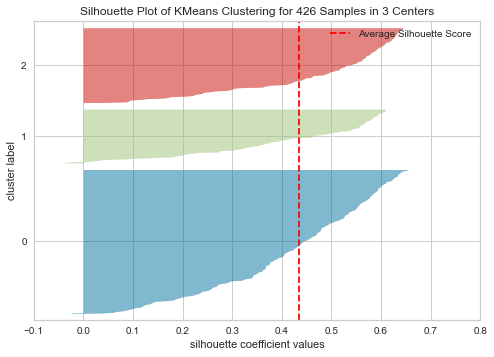

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [101]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()

In [102]:
score = silhouette_score(data,df['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.190


#### 2.1.3 각 군집 별 데이터 확인

**km_cluster == 0**

In [103]:
df_cluster_0 = df[df['km_cluster'] == 0][col]

In [104]:
df_cluster_0.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,2.767758,3.928499,38.926022,21.759121,3.533910,40.485409,7827.594151,0.096611,0.438807,0.584529,0.144348,7.026924,1.135090,6.377526,2.908910,4.055832,2.105914,1.413612
std,0.383521,0.590248,14.019435,7.831681,0.586530,23.891520,3084.217552,0.251522,0.483364,0.425010,0.190484,1.137074,1.125605,2.846978,1.917880,2.009031,1.099836,0.513060
min,1.825294,2.055744,11.052632,6.979381,0.773190,1.111111,402.970297,0.000000,0.000000,0.000000,0.000000,4.738724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500665,3.603166,28.440476,16.609589,3.297813,25.490196,6009.195402,0.000000,0.000000,0.344669,0.000000,6.163270,0.000000,4.216867,1.646091,2.872928,1.372549,1.085454
50%,2.767580,3.922445,38.206186,20.641176,3.607569,36.363636,7902.898551,0.000000,0.371287,0.512610,0.000000,6.879557,0.877193,6.214689,2.614379,3.747073,2.089552,1.382171
75%,3.048079,4.307671,47.473118,26.444444,3.873752,51.067073,9392.941176,0.000000,0.645161,0.777705,0.272205,7.681903,1.689189,8.387097,4.032258,5.263158,2.750000,1.753732
max,3.411887,4.971391,96.691258,49.467000,4.669978,143.137255,19100.000000,0.822681,2.857143,1.598453,0.575627,9.227525,4.266917,14.634146,9.501348,10.714286,5.357143,2.355625


In [105]:
df[df['km_cluster'] == 0]['DONG'].values

array(['사직동', '교남동', '가회동', '종로1.2.3.4가동', '종로5.6가동', '이화동', '혜화동',
       '창신1동', '창신2동', '창신3동', '숭인2동', '소공동', '회현동', '필동', '광희동', '을지로동',
       '신당동', '다산동', '약수동', '청구동', '신당5동', '중림동', '남영동', '청파동', '원효로1동',
       '효창동', '용문동', '이태원1동', '왕십리2동', '마장동', '사근동', '행당1동', '금호1가동',
       '금호2.3가동', '금호4가동', '성수1가2동', '성수2가1동', '성수2가3동', '중곡1동', '중곡3동',
       '자양3동', '자양4동', '구의2동', '구의3동', '용신동', '제기동', '전농1동', '전농2동',
       '답십리1동', '답십리2동', '회기동', '휘경1동', '휘경2동', '이문1동', '이문2동', '면목2동',
       '면목4동', '면목5동', '면목본동', '상봉1동', '중화1동', '중화2동', '묵1동', '묵2동',
       '망우3동', '신내2동', '삼선동', '안암동', '보문동', '길음1동', '종암동', '월곡1동', '월곡2동',
       '장위1동', '장위2동', '장위3동', '삼양동', '미아동', '송중동', '송천동', '번1동', '번2동',
       '수유2동', '수유3동', '창1동', '창2동', '창3동', '창4동', '창5동', '도봉2동', '쌍문2동',
       '쌍문3동', '쌍문4동', '방학1동', '방학2동', '월계1동', '월계3동', '공릉1동', '하계2동',
       '중계2.3동', '상계5동', '상계6.7동', '상계9동', '상계10동', '녹번동', '불광2동', '갈현1동',
       '갈현2동', '구산동', '응암1동', '역촌동', '신사1동', '신사2동', '증산동', '천연동

**km_cluster == 1**

In [106]:
df_cluster_1 = df[df['km_cluster'] == 1][col]

In [107]:
df_cluster_1.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2.825356,4.207485,74.552540,36.468203,4.177255,59.430285,10349.345355,0.108308,1.097996,1.072533,0.251439,7.290384,2.140693,15.694751,6.300320,7.473053,4.049565,1.817391
std,0.426160,0.642635,18.670731,9.611473,0.474700,34.759078,4026.206853,0.269398,0.894090,0.368877,0.213503,0.970104,1.459179,6.364987,2.663802,2.783281,1.597023,0.384060
min,1.563501,2.353640,33.086207,18.961538,1.996554,6.122449,1235.353535,0.000000,0.000000,0.265399,0.000000,5.240087,0.000000,5.907173,0.967742,1.287554,0.000000,0.810930
25%,2.577322,3.819742,56.532143,28.204543,3.978591,33.561121,7682.200274,0.000000,0.388036,0.810930,0.000000,6.675296,0.971251,11.111111,4.027383,5.555556,2.967540,1.515480
50%,2.838836,4.354182,74.345983,37.091769,4.245809,56.846691,10387.987355,0.000000,0.992562,1.090372,0.284537,7.211553,1.859834,14.052389,6.414286,7.121851,4.016129,1.818980
75%,3.120601,4.742641,96.535972,44.575819,4.563782,79.583333,12504.298784,0.000000,1.537028,1.329136,0.423160,7.936116,3.547059,18.997760,9.120813,8.962264,4.871324,2.146435
max,3.411887,4.971391,96.691258,49.467000,4.669978,167.705167,27574.074074,0.822681,4.000000,1.598453,0.575627,9.227525,4.266917,39.130435,9.501348,16.956522,9.090909,2.355625


In [108]:
df[df['km_cluster'] == 1]['DONG'].values

array(['숭인1동', '명동', '동화동', '황학동', '왕십리도선동', '행당2동', '화양동', '군자동', '중곡2동',
       '자양1동', '구의1동', '장안1동', '장안2동', '상봉2동', '동선동', '정릉1동', '길음2동',
       '삼각산동', '중계1동', '상계2동', '상계8동', '대조동', '응암2동', '응암3동', '남가좌1동',
       '아현동', '공덕동', '용강동', '염리동', '서교동', '목2동', '목3동', '목4동', '신정1동',
       '신정2동', '염창동', '등촌1동', '등촌2동', '등촌3동', '화곡2동', '화곡3동', '화곡8동',
       '우장산동', '방화1동', '구로4동', '독산2동', '독산4동', '영등포동', '당산1동', '신길5동',
       '상도3동', '사당4동', '청림동', '중앙동', '신림동', '서초1동', '서초2동', '서초4동',
       '방배본동', '방배1동', '신사동', '논현1동', '논현2동', '청담동', '삼성2동', '대치1동',
       '대치4동', '역삼1동', '역삼2동', '일원2동', '방이1동', '방이2동', '송파1동', '송파2동',
       '석촌동', '삼전동', '문정1동', '잠실7동', '명일1동', '천호1동', '천호3동', '성내1동',
       '성내2동', '성내3동'], dtype=object)

**km_cluster == 2**

In [109]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [110]:
df_cluster_2.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,2.175055,2.918968,13.925912,8.132826,2.661988,14.179745,3401.783492,0.021834,0.182648,0.231774,0.054454,6.384203,0.314689,2.453413,1.250377,1.589436,0.881877,0.762149
std,0.521693,0.798750,8.271157,3.882739,0.721219,11.407255,1987.196725,0.117380,0.275005,0.229663,0.100552,1.203690,0.434423,1.701811,0.954040,1.097081,0.578083,0.495136
min,0.876522,0.743888,0.357143,1.037855,0.696497,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,3.151686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.772422,2.332683,8.156463,5.113208,2.232962,5.540897,1949.350649,0.000000,0.000000,0.000000,0.000000,5.575459,0.000000,1.162791,0.519802,0.781250,0.476190,0.405465
50%,2.197888,2.940657,13.010178,7.714286,2.751078,11.581921,3125.688073,0.000000,0.065963,0.188131,0.000000,6.455154,0.159744,2.121212,1.118211,1.367054,0.798722,0.713766
75%,2.559672,3.491711,18.279528,10.558442,3.219118,19.186047,4546.774194,0.000000,0.277778,0.316518,0.070204,7.232114,0.478723,3.333333,1.776650,2.187500,1.255230,1.037210
max,3.411887,4.512763,43.450000,18.731034,4.047042,74.285714,12045.833333,0.771399,1.379310,1.145132,0.473784,9.227525,2.348993,8.637874,5.263158,5.633803,2.816901,2.218847


In [111]:
df[df['km_cluster'] == 2]['DONG'].values

array(['청운효자동', '삼청동', '부암동', '평창동', '무악동', '장충동', '후암동', '용산2가동',
       '원효로2동', '한강로동', '이촌1동', '이촌2동', '이태원2동', '한남동', '서빙고동', '보광동',
       '응봉동', '옥수동', '성수1가1동', '송정동', '용답동', '중곡4동', '능동', '광장동', '자양2동',
       '청량리동', '면목7동', '면목3.8동', '망우본동', '신내1동', '성북동', '돈암1동', '돈암2동',
       '정릉2동', '정릉3동', '정릉4동', '석관동', '번3동', '수유1동', '우이동', '인수동', '도봉1동',
       '쌍문1동', '방학3동', '월계2동', '공릉2동', '하계1동', '중계본동', '중계4동', '상계1동',
       '상계3.4동', '불광1동', '수색동', '진관동', '연희동', '홍제1동', '홍제2동', '홍은1동',
       '홍은2동', '합정동', '성산2동', '상암동', '신월3동', '신월7동', '신정3동', '가양1동',
       '가양2동', '공항동', '방화2동', '방화3동', '오류2동', '수궁동', '항동', '독산1동', '시흥1동',
       '시흥2동', '시흥3동', '시흥5동', '여의동', '도림동', '양평2동', '대림3동', '사당2동',
       '낙성대동', '남현동', '대학동', '삼성동', '미성동', '방배2동', '방배3동', '양재1동', '양재2동',
       '내곡동', '개포1동', '개포2동', '개포4동', '세곡동', '일원본동', '수서동', '풍납1동',
       '풍납2동', '마천2동', '오륜동', '문정2동', '위례동', '잠실2동', '잠실3동', '잠실4동',
       '잠실6동', '강일동', '상일1동', '고덕1동', '고덕2동', '암사2동', '암사3동', '둔촌1동',
     

### 2.2 2차 k-means_clustering

#### 2.2.1 km_cluster == 0

- Elbow 관측

In [112]:
df_0 = df[df['km_cluster'] == 0][tmp_df.columns]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,57.907859,28.054201,2.585990,16.531165,2234.959350,0.594987,0.000000,1.598453,0.000000,9.227525,0.813008,14.634146,2.439024,4.065041,0.813008,2.015445
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,56.628571,22.914286,3.727413,102.857143,8122.857143,0.000000,2.857143,1.598453,0.000000,9.227525,0.000000,5.714286,0.000000,0.000000,2.857143,1.349927
7,종로구,가회동,1111060000,4194,0.54,7767,2.829940,4.128925,14.037037,31.055556,1.969441,5.555556,1922.222222,0.000000,0.000000,1.548350,0.000000,9.227525,1.851852,1.851852,0.000000,0.000000,0.000000,2.355625
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,3.116128,3.623111,63.449645,38.234752,3.489390,29.929078,1008.510638,0.822681,0.425532,1.598453,0.354545,9.227525,1.702128,4.255319,2.127660,7.659574,0.000000,2.355625
9,종로구,종로5.6가동,1111063000,5476,0.60,9127,3.099341,4.214594,96.691258,28.533333,2.498700,88.333333,3541.666667,0.000000,0.000000,0.000000,0.000000,9.227525,0.000000,0.000000,0.000000,0.000000,0.000000,0.980829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,강동구,상일2동,1174052600,10200,0.54,18889,3.252024,3.686098,24.981481,22.064815,3.463128,138.888889,4061.111111,0.000000,0.000000,0.655407,0.575627,8.295918,0.000000,4.629630,5.555556,1.851852,1.851852,1.047969
411,강동구,명일2동,1174054000,17568,0.97,18111,2.634629,3.447202,71.041237,19.206186,4.669978,14.948454,4338.144330,0.000000,1.546392,0.934677,0.000000,7.710390,1.546392,8.762887,6.185567,5.670103,2.061856,1.409225
414,강동구,암사1동,1174057000,34782,1.02,34100,2.178902,3.809273,28.078431,15.738562,3.868815,13.398693,9568.627451,0.000000,1.307190,0.282768,0.000000,7.254922,0.326797,5.228758,2.614379,1.307190,1.633987,0.502952
418,강동구,천호2동,1174061000,33753,1.57,21499,2.314614,4.058721,39.966030,20.125265,3.027289,17.409766,7136.942675,0.000000,1.273885,0.614784,0.192531,6.824030,2.760085,2.972399,1.486200,3.609342,0.849257,0.910755


In [113]:
col_0 = df_0.columns[6:]
data_0 = df_0[col_0].values

In [114]:
pca_transformed_0 = pca.fit_transform(data_0)
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,57.907859,28.054201,2.585990,16.531165,2234.959350,0.594987,0.000000,1.598453,0.000000,9.227525,0.813008,14.634146,2.439024,4.065041,0.813008,2.015445,-5592.655702,-13.851530
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,56.628571,22.914286,3.727413,102.857143,8122.857143,0.000000,2.857143,1.598453,0.000000,9.227525,0.000000,5.714286,0.000000,0.000000,2.857143,1.349927,295.344148,63.916762
7,종로구,가회동,1111060000,4194,0.54,7767,2.829940,4.128925,14.037037,31.055556,1.969441,5.555556,1922.222222,0.000000,0.000000,1.548350,0.000000,9.227525,1.851852,1.851852,0.000000,0.000000,0.000000,2.355625,-5905.416681,-30.518846
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,3.116128,3.623111,63.449645,38.234752,3.489390,29.929078,1008.510638,0.822681,0.425532,1.598453,0.354545,9.227525,1.702128,4.255319,2.127660,7.659574,0.000000,2.355625,-6819.086445,1.804405
9,종로구,종로5.6가동,1111063000,5476,0.60,9127,3.099341,4.214594,96.691258,28.533333,2.498700,88.333333,3541.666667,0.000000,0.000000,0.000000,0.000000,9.227525,0.000000,0.000000,0.000000,0.000000,0.000000,0.980829,-4285.854133,61.096631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,강동구,상일2동,1174052600,10200,0.54,18889,3.252024,3.686098,24.981481,22.064815,3.463128,138.888889,4061.111111,0.000000,0.000000,0.655407,0.575627,8.295918,0.000000,4.629630,5.555556,1.851852,1.851852,1.047969,-3766.359541,100.231993
411,강동구,명일2동,1174054000,17568,0.97,18111,2.634629,3.447202,71.041237,19.206186,4.669978,14.948454,4338.144330,0.000000,1.546392,0.934677,0.000000,7.710390,1.546392,8.762887,6.185567,5.670103,2.061856,1.409225,-3489.472819,-16.279456
414,강동구,암사1동,1174057000,34782,1.02,34100,2.178902,3.809273,28.078431,15.738562,3.868815,13.398693,9568.627451,0.000000,1.307190,0.282768,0.000000,7.254922,0.326797,5.228758,2.614379,1.307190,1.633987,0.502952,1740.995140,-30.591721
418,강동구,천호2동,1174061000,33753,1.57,21499,2.314614,4.058721,39.966030,20.125265,3.027289,17.409766,7136.942675,0.000000,1.273885,0.614784,0.192531,6.824030,2.760085,2.972399,1.486200,3.609342,0.849257,0.910755,-690.680262,-21.859929


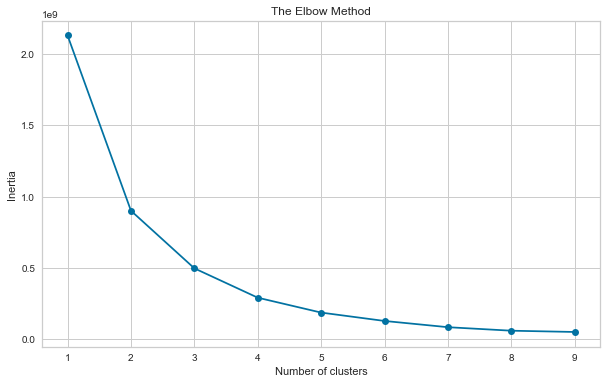

In [115]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_0)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [116]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_0 = kmeans.fit(pca_transformed_0)
# Getting unique labels
u_labels = np.unique(label_0)

In [117]:
df_0['km_cluster'] = kmeans.labels_
df_0.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
1,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
2,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


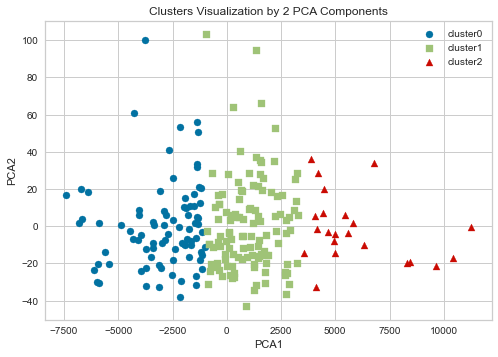

In [118]:
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_0['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_0[df_0['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_0.loc[markers[i], 'pca_x'], y = df_0.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [119]:
df_0[df_0['pca_y'] > 12.5] # 교육, MZ 세대가 많은 편, 동물병원 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,56.628571,22.914286,3.727413,102.857143,8122.857143,0.000000,2.857143,1.598453,0.000000,9.227525,0.000000,5.714286,0.000000,0.000000,2.857143,1.349927,295.344148,63.916762,1
9,종로구,종로5.6가동,1111063000,5476,0.60,9127,3.099341,4.214594,96.691258,28.533333,2.498700,88.333333,3541.666667,0.000000,0.000000,0.000000,0.000000,9.227525,0.000000,0.000000,0.000000,0.000000,0.000000,0.980829,-4285.854133,61.096631,0
18,중구,회현동,1114054000,5432,0.84,6467,3.358638,4.757687,73.321429,49.467000,0.818835,45.833333,1413.095238,0.784119,0.000000,1.598453,0.000000,9.012302,0.000000,5.952381,0.000000,8.928571,0.000000,2.355625,-6414.479646,18.523281,0
23,중구,을지로동,1114060500,1914,0.60,3190,3.411887,4.598481,73.866667,49.467000,0.773190,46.666667,1106.666667,0.000000,0.000000,1.598453,0.000000,9.227525,1.666667,3.333333,5.000000,3.333333,5.000000,2.355625,-6720.907627,19.976823,0
24,중구,신당동,1114061500,9095,0.55,16536,3.411887,4.965807,62.496970,42.000000,3.195328,56.666667,6552.727273,0.822681,0.303030,1.597243,0.000000,8.337291,0.000000,11.515152,2.424242,9.393939,2.727273,0.922333,-1274.839410,21.147821,0
27,중구,청구동,1114064500,13818,0.34,40641,1.958436,4.971391,61.509804,42.382353,3.658269,71.078431,12041.176471,0.000000,0.490196,0.398908,0.000000,6.254997,0.000000,9.803922,0.980392,6.372549,4.411765,1.238658,4213.623126,28.344455,2
28,중구,신당5동,1114065000,10708,0.39,27456,2.599837,4.943899,53.623932,36.948718,3.524851,61.965812,9053.846154,0.000000,0.427350,0.355820,0.000000,6.118078,0.000000,8.547009,0.854701,5.555556,3.846154,1.143188,1226.281962,21.948174,1
55,성동구,금호1가동,1120059000,15315,0.46,33293,3.411887,3.636441,31.434783,13.434783,4.275760,65.217391,9245.652174,0.000000,0.000000,0.000000,0.000000,8.305108,0.000000,6.521739,4.347826,0.000000,0.000000,1.676690,1418.085631,21.559969,1
83,동대문구,전농2동,1123057000,18876,0.86,21949,2.334624,4.182583,37.965116,24.959302,3.847050,63.372093,5343.023256,0.000000,0.581395,0.458308,0.458308,7.260588,2.325581,5.813953,2.325581,5.813953,1.744186,2.076530,-2484.540019,25.662391,0
84,동대문구,답십리1동,1123060000,29373,0.81,36263,3.193368,4.158304,57.790123,21.660494,3.844220,79.012346,11702.469136,0.000000,0.617284,0.480748,0.000000,7.320445,0.617284,8.641975,3.703704,4.320988,3.703704,1.548350,3874.924183,35.909973,2


In [120]:
df_0[df_0['km_cluster'] == 2].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,1.146108e+09,25659.181818,0.706818,36380.272727,2.799745,4.019564,45.084362,24.976261,3.624541,45.769836,13758.333968,0.074789,0.377483,0.563780,0.100456,6.509993,1.529152,7.947883,2.575737,5.152266,2.465945,1.497840,5930.743180,-1.414361,2.0
std,1.992953e+07,9740.239024,0.234874,5719.481805,0.410978,0.545019,9.317160,6.740811,0.289023,17.343631,2258.506210,0.242070,0.242647,0.289661,0.145397,1.028925,1.266238,2.742387,1.304785,1.865076,0.796748,0.330795,2258.500629,18.130246,0.0
min,1.111071e+09,10175.000000,0.280000,25563.000000,1.958436,2.678541,28.170732,14.234043,2.833213,9.574468,11373.134328,0.000000,0.000000,0.000000,0.000000,5.020232,0.000000,0.000000,0.000000,2.439024,1.412429,0.613810,3545.525309,-32.713633,2.0
25%,1.123818e+09,18702.750000,0.600000,31384.500000,2.513385,3.758802,39.438776,20.656569,3.476466,33.495671,12091.199813,0.000000,0.273458,0.445725,0.000000,5.880268,0.629630,6.421375,1.814184,3.532019,1.887175,1.313171,4263.639395,-14.415178,2.0
50%,1.156066e+09,24878.000000,0.735000,37407.500000,2.873150,3.975452,46.261171,23.307540,3.659578,42.793367,12801.020408,0.000000,0.365079,0.538818,0.000000,6.149011,1.508556,8.798600,2.296265,5.259097,2.244450,1.489893,4973.418816,-3.398881,2.0
75%,1.162060e+09,30458.500000,0.805000,40685.250000,3.035540,4.334375,50.301207,29.621214,3.775861,54.150132,14495.901387,0.000000,0.541076,0.701868,0.132342,7.300524,2.431552,9.791966,3.703704,6.207983,2.807751,1.662825,6668.342417,5.750412,2.0
max,1.171065e+09,52770.000000,1.180000,47116.000000,3.402010,4.971391,61.509804,42.382353,4.177198,82.203390,19100.000000,0.822681,0.797872,1.235188,0.500382,9.227525,4.266917,11.170213,4.878049,10.714286,4.411765,2.097141,11272.414994,35.909973,2.0


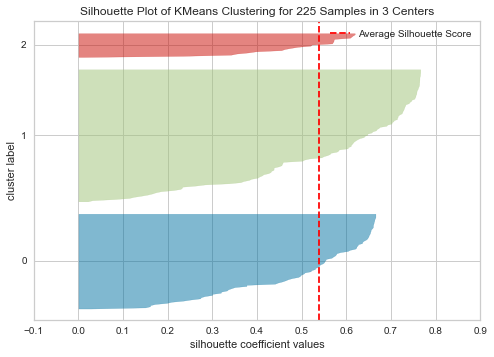

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 225 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [121]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_transformed_0)      
visualizer.show()

In [122]:
score = silhouette_score(data_0,df_0['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.538


#### 2.2.2 km_cluster == 1

- Elbow 관측

In [123]:
df_1 = df[df['km_cluster'] == 1][tmp_df.columns]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
15,종로구,숭인1동,1111070000,6106,0.23,26548,3.411887,4.399802,58.130435,32.152174,3.232693,67.391304,7308.695652,0.822681,0.000000,1.154965,0.000000,8.385628,4.266917,10.869565,4.347826,8.695652,4.347826,2.017797
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,96.691258,49.467000,2.770377,44.444444,1235.353535,0.822681,0.000000,1.598453,0.575627,9.227525,1.010101,18.181818,3.030303,7.070707,0.000000,2.355625
29,중구,동화동,1114066500,10433,0.26,40127,2.192942,4.971391,80.435897,49.467000,3.920449,92.948718,10430.769231,0.000000,0.641026,0.495321,0.000000,6.522809,0.000000,12.820513,1.282051,8.333333,5.769231,1.436305
30,중구,황학동,1114067000,13444,0.33,40739,2.895410,4.971391,67.333333,42.151515,1.996554,81.818182,16354.545455,0.000000,3.030303,1.393842,0.000000,8.074998,4.266917,18.181818,9.090909,6.060606,9.090909,1.954531
49,성동구,왕십리도선동,1120053500,26910,0.72,37375,3.136701,4.283970,96.691258,31.694444,4.124779,71.527778,12405.555556,0.000000,0.000000,1.329136,0.000000,9.109709,0.000000,18.055556,4.166667,5.555556,4.861111,2.072473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,2.682371,4.842781,88.375587,44.502347,3.793958,38.497653,10816.901408,0.000000,2.816901,1.057073,0.384911,7.617000,4.266917,6.572770,3.286385,7.981221,1.877934,1.455444
419,강동구,천호3동,1174062000,27000,0.79,34177,1.995303,4.736901,79.426160,39.995781,3.689723,34.599156,12037.974684,0.000000,2.531646,0.988710,0.352023,7.510287,4.266917,5.907173,2.953586,7.172996,1.687764,1.374623
420,강동구,성내1동,1174064000,20045,0.58,34560,2.323627,4.532105,96.691258,49.467000,4.376335,35.632184,10234.482759,0.000000,1.149425,1.193574,0.000000,7.819147,2.873563,17.241379,8.045977,11.494253,4.597701,1.614025
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,84.378109,44.522388,4.234034,30.845771,12134.328358,0.000000,0.995025,1.095290,0.000000,7.674959,2.487562,14.925373,6.965174,9.950249,3.980100,1.500200


In [124]:
col_1 = df_1.columns[6:]
data_1 = df_1[col_1].values

In [125]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
15,종로구,숭인1동,1111070000,6106,0.23,26548,3.411887,4.399802,58.130435,32.152174,3.232693,67.391304,7308.695652,0.822681,0.000000,1.154965,0.000000,8.385628,4.266917,10.869565,4.347826,8.695652,4.347826,2.017797,-3040.614829,12.813322
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,96.691258,49.467000,2.770377,44.444444,1235.353535,0.822681,0.000000,1.598453,0.575627,9.227525,1.010101,18.181818,3.030303,7.070707,0.000000,2.355625,-9114.017815,2.564160
29,중구,동화동,1114066500,10433,0.26,40127,2.192942,4.971391,80.435897,49.467000,3.920449,92.948718,10430.769231,0.000000,0.641026,0.495321,0.000000,6.522809,0.000000,12.820513,1.282051,8.333333,5.769231,1.436305,81.482642,33.957550
30,중구,황학동,1114067000,13444,0.33,40739,2.895410,4.971391,67.333333,42.151515,1.996554,81.818182,16354.545455,0.000000,3.030303,1.393842,0.000000,8.074998,4.266917,18.181818,9.090909,6.060606,9.090909,1.954531,6005.234812,11.273564
49,성동구,왕십리도선동,1120053500,26910,0.72,37375,3.136701,4.283970,96.691258,31.694444,4.124779,71.527778,12405.555556,0.000000,0.000000,1.329136,0.000000,9.109709,0.000000,18.055556,4.166667,5.555556,4.861111,2.072473,2056.209129,9.139454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,2.682371,4.842781,88.375587,44.502347,3.793958,38.497653,10816.901408,0.000000,2.816901,1.057073,0.384911,7.617000,4.266917,6.572770,3.286385,7.981221,1.877934,1.455444,467.508159,-20.753892
419,강동구,천호3동,1174062000,27000,0.79,34177,1.995303,4.736901,79.426160,39.995781,3.689723,34.599156,12037.974684,0.000000,2.531646,0.988710,0.352023,7.510287,4.266917,5.907173,2.953586,7.172996,1.687764,1.374623,1688.578663,-27.315920
420,강동구,성내1동,1174064000,20045,0.58,34560,2.323627,4.532105,96.691258,49.467000,4.376335,35.632184,10234.482759,0.000000,1.149425,1.193574,0.000000,7.819147,2.873563,17.241379,8.045977,11.494253,4.597701,1.614025,-114.922612,-22.328882
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,84.378109,44.522388,4.234034,30.845771,12134.328358,0.000000,0.995025,1.095290,0.000000,7.674959,2.487562,14.925373,6.965174,9.950249,3.980100,1.500200,1784.920149,-31.119351


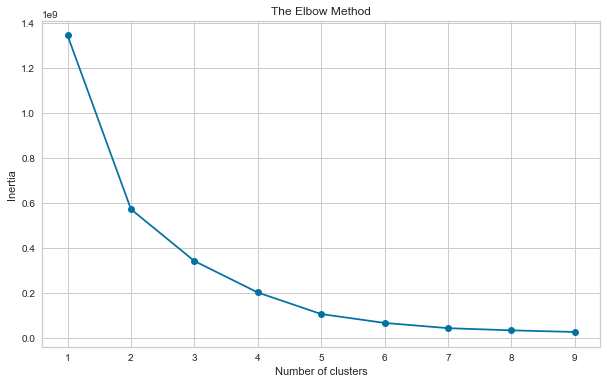

In [126]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 2(Elbow)로 설정

In [127]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [128]:
df_1['km_cluster'] = kmeans.labels_
df_1.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
1,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


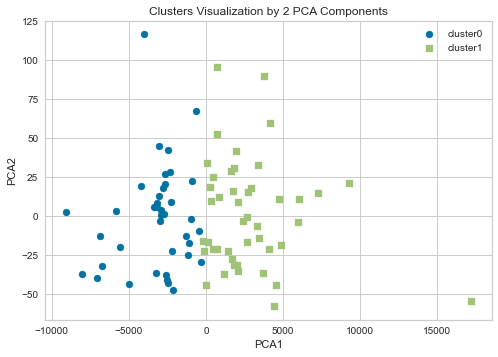

In [129]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1'])
plt.show()

In [130]:
df_1[df_1['pca_y'] > 20] # 편의시설, 교육이 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
29,중구,동화동,1114066500,10433,0.26,40127,2.192942,4.971391,80.435897,49.467000,3.920449,92.948718,10430.769231,0.000000,0.641026,0.495321,0.000000,6.522809,0.000000,12.820513,1.282051,8.333333,5.769231,1.436305,81.482642,33.957550,1
117,성북구,정릉1동,1129062000,18377,0.44,41766,3.374584,4.971391,91.250000,49.467000,4.669978,112.689394,11086.363636,0.000000,2.272727,1.062619,0.000000,8.019680,0.757576,13.636364,9.090909,11.553030,6.060606,1.779053,737.102442,52.932133,1
122,성북구,길음2동,1129068500,16780,0.58,28931,3.230305,4.861059,70.298851,39.436782,4.667767,75.287356,7715.517241,0.000000,2.298851,1.193574,0.000000,7.625803,1.724138,10.919540,4.597701,9.770115,6.321839,1.820090,-2633.788654,20.662278,0
182,은평구,대조동,1138057000,27204,0.85,32005,3.411887,4.408869,96.691258,30.894118,3.923952,84.705882,10818.823529,0.000000,0.000000,0.777705,0.000000,8.188967,3.529412,14.117647,2.352941,4.705882,5.882353,2.342936,469.505395,25.259443,1
184,은평구,응암2동,1138059000,28107,0.78,36035,3.082263,4.648410,57.418803,18.961538,4.023824,126.923077,9669.230769,0.000000,1.709402,0.617723,0.355820,7.176784,0.854701,11.538462,2.564103,5.555556,3.846154,1.880313,-679.976614,67.636969,0
185,은평구,응암3동,1138060000,24637,0.63,39106,2.964291,4.860140,71.089947,23.476190,4.233953,157.142857,11041.269841,0.000000,2.116402,0.721832,0.424680,7.390211,1.058201,14.285714,3.174603,6.878307,4.761905,2.064113,692.104009,95.962523,1
202,서대문구,남가좌1동,1141069000,15627,0.51,30641,2.856019,3.564272,68.627451,37.078431,4.235668,99.019608,7327.450980,0.000000,0.980392,1.085454,0.575627,7.652499,3.921569,7.843137,0.980392,9.803922,4.901961,2.355625,-3021.808678,45.023284,0
224,양천구,목3동,1147053000,21977,0.53,41466,2.941455,4.227522,96.691258,40.713208,4.669978,97.358491,13743.396226,0.000000,1.886792,1.563098,0.320168,6.136667,3.018868,24.905660,9.433962,9.811321,7.924528,2.145600,3394.094604,32.607756,1
225,양천구,목4동,1147054000,25544,0.57,44814,2.775873,4.155863,96.484211,37.856140,4.669978,90.526316,11977.192982,0.000000,1.754386,1.506025,0.300754,6.064071,2.807018,23.157895,8.771930,9.122807,7.368421,2.081632,1627.882565,28.935472,1
235,양천구,신정2동,1147063000,19596,0.52,37685,2.801805,3.950504,76.115385,33.913462,4.669978,97.435897,7873.076923,0.000000,1.282051,0.825075,0.278020,5.973777,1.602564,15.705128,8.653846,8.333333,5.128205,2.300018,-2476.195415,42.436342,0


In [131]:
df_1[df_1['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
count,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,1.152984e+09,23634.384615,1.018718,25625.820513,2.734357,4.200069,74.131644,36.257793,4.240580,52.315946,7089.404277,0.162824,0.916487,1.095409,0.309451,7.267363,1.979249,16.385360,6.958714,7.077650,3.730391,1.830376,-3259.947384,-1.282541,0.0
std,1.705587e+07,9503.691728,0.501556,8652.449230,0.449862,0.620638,20.274306,10.065717,0.434382,34.737989,2102.597672,0.326601,0.843472,0.444980,0.194520,0.949275,1.350068,7.306836,2.514205,2.912768,1.231649,0.419700,2102.617931,33.652425,0.0
min,1.111070e+09,3742.000000,0.230000,3780.000000,1.563501,3.049981,33.086207,18.961538,2.770377,6.122449,1235.353535,0.000000,0.000000,0.265399,0.000000,5.333431,0.000000,7.142857,0.980392,1.287554,0.000000,0.810930,-9114.017815,-47.404115,0.0
25%,1.144062e+09,17282.500000,0.620000,19805.000000,2.463585,3.618323,55.255556,27.427957,4.004892,28.952725,6650.368909,0.000000,0.282606,0.806356,0.198619,6.709505,0.932401,11.261832,5.085230,5.382832,3.195745,1.597650,-3698.888423,-27.203487,0.0
50%,1.154564e+09,21331.000000,0.880000,28437.000000,2.774176,4.332277,76.115385,35.556338,4.282954,53.160920,7582.432432,0.000000,0.869565,1.145132,0.334202,7.176784,1.612903,14.020270,7.294833,6.849315,3.813559,1.817871,-2766.856835,1.013882,0.0
75%,1.168055e+09,29123.000000,1.250000,31499.500000,3.041512,4.787904,96.691258,45.847754,4.668873,69.886128,8122.465098,0.000000,1.260593,1.572708,0.463548,7.960443,2.957340,19.505975,9.501348,8.514493,4.197761,2.227291,-2226.899663,15.334233,0.0
max,1.174066e+09,43181.000000,2.350000,42662.000000,3.411887,4.971391,96.691258,49.467000,4.669978,167.705167,10028.169014,0.822681,4.000000,1.598453,0.575627,9.227525,4.266917,39.130435,9.501348,16.521739,6.521739,2.355625,-321.234368,116.625138,0.0


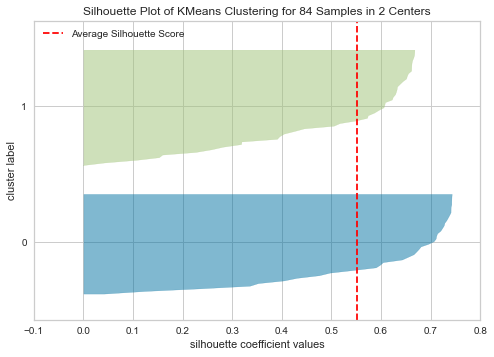

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 84 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [132]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [133]:
score = silhouette_score(data_1,df_1['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.552


#### 2.2.3 km_cluster == 2

- Elbow 관측

In [134]:
df_2 = df[df['km_cluster'] == 2][tmp_df.columns]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,4.368353,4.543450,1.901003,2.853437,1249.027237,0.0,0.000000,0.121954,0.000000,8.898694,0.389105,0.000000,0.000000,0.389105,0.778210,1.080287
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,4.496644,9.315436,0.696497,7.382550,459.060403,0.0,0.000000,0.513507,0.000000,9.156110,0.000000,2.013423,0.000000,0.671141,0.000000,1.614793
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,1.682819,4.854626,2.305664,2.202643,1138.766520,0.0,0.000000,0.000000,0.000000,7.888078,0.000000,0.881057,0.881057,2.202643,1.321586,0.365010
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,1.517475,1.312289,1.167229,1.127396,518.263811,0.0,0.000000,0.106825,0.000000,6.121540,0.000000,0.563698,0.563698,0.000000,0.000000,0.203332
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,13.888889,9.388889,3.804190,36.111111,5061.111111,0.0,0.000000,0.000000,0.000000,8.630700,0.000000,0.000000,2.777778,2.777778,0.000000,1.329136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,강동구,고덕2동,1174056000,22329,2.01,11109,1.881324,3.173275,11.184080,6.059701,3.091947,21.641791,2992.537313,0.0,0.248756,0.222148,0.000000,6.982276,0.000000,1.492537,0.248756,0.497512,0.995025,0.557481
415,강동구,암사2동,1174058000,15252,1.18,12925,2.316332,3.667032,24.271186,13.604520,3.726374,11.581921,3988.135593,0.0,1.129944,0.248800,0.000000,7.109321,0.282486,4.519774,2.259887,1.129944,1.412429,0.447868
416,강동구,암사3동,1174059000,17947,2.51,7150,1.857501,2.940657,11.410359,6.395750,2.998385,5.444887,1699.203187,0.0,0.531208,0.124694,0.000000,6.355473,0.132802,2.124834,1.062417,0.531208,0.664011,0.235550
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,15.467391,12.885870,3.466245,0.000000,35.869565,0.0,0.000000,0.000000,0.434038,7.763289,0.000000,4.347826,3.260870,2.173913,1.630435,0.434038


In [135]:
col_2 = df_2.columns[6:]
data_2 = df_2[col_2].values

In [136]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,4.368353,4.543450,1.901003,2.853437,1249.027237,0.0,0.000000,0.121954,0.000000,8.898694,0.389105,0.000000,0.000000,0.389105,0.778210,1.080287,-2152.788177,-8.874343
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,4.496644,9.315436,0.696497,7.382550,459.060403,0.0,0.000000,0.513507,0.000000,9.156110,0.000000,2.013423,0.000000,0.671141,0.000000,1.614793,-2942.740315,-2.259346
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,1.682819,4.854626,2.305664,2.202643,1138.766520,0.0,0.000000,0.000000,0.000000,7.888078,0.000000,0.881057,0.881057,2.202643,1.321586,0.365010,-2263.053102,-9.749860
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,1.517475,1.312289,1.167229,1.127396,518.263811,0.0,0.000000,0.106825,0.000000,6.121540,0.000000,0.563698,0.563698,0.000000,0.000000,0.203332,-2883.560160,-9.943758
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,13.888889,9.388889,3.804190,36.111111,5061.111111,0.0,0.000000,0.000000,0.000000,8.630700,0.000000,0.000000,2.777778,2.777778,0.000000,1.329136,1659.361819,17.901258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,강동구,고덕2동,1174056000,22329,2.01,11109,1.881324,3.173275,11.184080,6.059701,3.091947,21.641791,2992.537313,0.0,0.248756,0.222148,0.000000,6.982276,0.000000,1.492537,0.248756,0.497512,0.995025,0.557481,-409.238439,7.323228
415,강동구,암사2동,1174058000,15252,1.18,12925,2.316332,3.667032,24.271186,13.604520,3.726374,11.581921,3988.135593,0.0,1.129944,0.248800,0.000000,7.109321,0.282486,4.519774,2.259887,1.129944,1.412429,0.447868,586.367784,-1.022043
416,강동구,암사3동,1174059000,17947,2.51,7150,1.857501,2.940657,11.410359,6.395750,2.998385,5.444887,1699.203187,0.0,0.531208,0.124694,0.000000,6.355473,0.132802,2.124834,1.062417,0.531208,0.664011,0.235550,-1702.595744,-5.607759
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,15.467391,12.885870,3.466245,0.000000,35.869565,0.0,0.000000,0.000000,0.434038,7.763289,0.000000,4.347826,3.260870,2.173913,1.630435,0.434038,-3365.920059,-5.801720


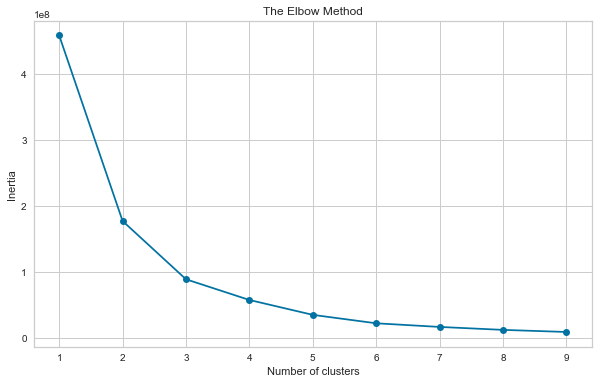

In [137]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 2(Elbow)로 설정

In [138]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [139]:
df_2['km_cluster'] = kmeans.labels_
df_2.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
1,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42


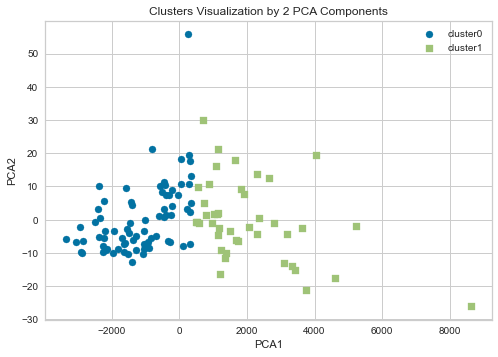

In [140]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3'])
plt.show()

In [141]:
df_2[df_2['pca_x'] > 8000] # 편의시설의 수가 적고, MZ 세대 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
114,성북구,돈암2동,1129059000,23913,0.48,49819,3.192703,2.965416,8.326389,2.982639,3.256894,7.986111,12045.833333,0.0,0.347222,0.298045,0.0,6.429876,0.0,1.041667,1.736111,1.388889,0.347222,0.0,8643.997719,-26.031544,1


In [142]:
df_2[df_2['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
count,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.0
mean,1.144245e+09,23261.800000,3.529600,8508.680000,1.991327,2.729859,11.866801,6.872793,2.433493,12.436530,2241.884172,0.023776,0.171259,0.256013,0.054597,6.284374,0.268675,2.105055,1.000758,1.294886,0.720520,0.730300,-1159.903228,0.190933,0.0
std,2.039842e+07,10240.278514,2.748793,4239.128879,0.450308,0.775681,8.180482,3.306944,0.736655,11.440948,1002.704185,0.117208,0.253705,0.232165,0.097751,1.258844,0.363490,1.523606,0.807305,0.976827,0.454615,0.449039,1002.720370,10.555880,0.0
min,1.111052e+09,144.000000,0.920000,157.000000,0.876522,0.743888,0.357143,1.037855,0.696497,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,3.151686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3365.920059,-12.703321,0.0
25%,1.129058e+09,16965.500000,1.830000,5155.500000,1.658480,2.141104,5.448523,4.620724,1.906070,4.741932,1460.947662,0.000000,0.000000,0.119617,0.000000,5.564744,0.000000,1.012280,0.387954,0.593895,0.362395,0.385414,-1940.855991,-7.351887,0.0
50%,1.141066e+09,22329.000000,2.580000,8090.000000,1.941173,2.754985,10.919149,6.482072,2.453789,8.464567,2342.352941,0.000000,0.068353,0.197359,0.000000,6.293174,0.132802,1.898734,0.806452,1.123596,0.664011,0.665967,-1059.447099,-3.323063,0.0
75%,1.165062e+09,28550.500000,3.275000,11978.000000,2.380937,3.208600,15.146890,8.651873,3.026081,18.393250,3038.846154,0.000000,0.263732,0.350311,0.076790,7.255867,0.377271,2.845238,1.388956,1.655549,1.001110,0.990253,-362.931207,5.473379,0.0
max,1.174069e+09,56012.000000,12.680000,16945.000000,3.040091,4.448352,43.450000,18.731034,4.047042,74.285714,3761.111111,0.700733,1.379310,1.145132,0.473784,9.156110,1.605505,8.637874,3.260870,4.482759,1.666667,1.994592,359.366648,55.765956,0.0


In [143]:
df_2[df_2['pca_y'] > 6] # 동물병원 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,13.888889,9.388889,3.804190,36.111111,5061.111111,0.000000,0.000000,0.000000,0.000000,8.630700,0.000000,0.000000,2.777778,2.777778,0.000000,1.329136,1659.361819,17.901258,1
40,용산구,한강로동,1117062500,23411,2.90,8073,2.419602,2.717204,22.213793,18.731034,1.590642,18.275862,3081.724138,0.000000,1.379310,1.121341,0.000000,7.938347,1.379310,2.758621,1.379310,4.482759,0.689655,1.121341,-320.028582,7.443080,0
42,용산구,이촌2동,1117064000,8374,1.22,6864,1.948249,2.556083,17.655738,4.487705,2.667342,20.081967,1826.229508,0.000000,0.000000,0.598656,0.000000,6.502765,0.000000,2.459016,1.639344,0.409836,1.639344,0.801781,-1575.535755,9.477675,0
58,성동구,옥수동,1120064500,26309,1.94,13561,2.741837,2.166990,18.268041,5.515464,3.201614,24.742268,3943.298969,0.000000,0.000000,0.415722,0.000000,6.866686,0.000000,5.670103,1.546392,1.546392,2.061856,1.119021,541.537859,9.884863,1
72,광진구,광장동,1121581000,34834,2.39,14575,2.462695,2.723001,11.238494,8.987448,3.579909,23.430962,3182.426778,0.000000,0.000000,0.349537,0.000000,6.701924,0.000000,4.184100,1.255230,0.418410,1.255230,0.813252,-219.343198,9.056213,0
98,중랑구,면목7동,1126057000,22070,1.20,18392,2.238047,4.382374,27.558333,15.238889,2.965703,22.777778,5317.500000,0.000000,0.277778,0.130053,0.000000,5.518233,0.972222,3.333333,1.111111,2.222222,1.666667,1.365241,1915.753618,7.873241,1
108,중랑구,신내1동,1126068000,38649,2.56,15097,2.464850,2.942793,12.777344,6.287109,3.245244,33.398438,3706.640625,0.000000,0.390625,0.178408,0.178408,5.858000,0.195312,1.757812,1.171875,0.781250,0.976562,1.146906,304.886018,17.619191,0
129,성북구,석관동,1129081000,35829,1.73,20710,2.343916,4.512763,23.375723,11.179191,3.098111,30.635838,6047.976879,0.000000,1.156069,0.000000,0.000000,6.938901,0.578035,3.468208,1.156069,1.734104,1.156069,0.456180,2646.231813,12.691383,1
177,은평구,불광1동,1138052000,38777,3.13,12389,1.903489,3.320613,16.277955,5.003195,2.725679,21.565495,3369.329073,0.277244,0.000000,0.148200,0.000000,6.194034,0.159744,2.076677,1.118211,2.396166,0.798722,1.123850,-32.440156,7.430543,0
190,은평구,수색동,1138065000,12752,1.29,9885,2.292456,3.014546,5.286822,4.434109,1.907531,25.581395,2823.255814,0.000000,0.000000,0.573910,0.000000,7.771949,0.000000,0.000000,0.000000,0.775194,0.000000,0.000000,-578.523874,10.060955,0


In [144]:
df_2[df_2['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
count,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.0
mean,1.144245e+09,23261.800000,3.529600,8508.680000,1.991327,2.729859,11.866801,6.872793,2.433493,12.436530,2241.884172,0.023776,0.171259,0.256013,0.054597,6.284374,0.268675,2.105055,1.000758,1.294886,0.720520,0.730300,-1159.903228,0.190933,0.0
std,2.039842e+07,10240.278514,2.748793,4239.128879,0.450308,0.775681,8.180482,3.306944,0.736655,11.440948,1002.704185,0.117208,0.253705,0.232165,0.097751,1.258844,0.363490,1.523606,0.807305,0.976827,0.454615,0.449039,1002.720370,10.555880,0.0
min,1.111052e+09,144.000000,0.920000,157.000000,0.876522,0.743888,0.357143,1.037855,0.696497,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,3.151686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3365.920059,-12.703321,0.0
25%,1.129058e+09,16965.500000,1.830000,5155.500000,1.658480,2.141104,5.448523,4.620724,1.906070,4.741932,1460.947662,0.000000,0.000000,0.119617,0.000000,5.564744,0.000000,1.012280,0.387954,0.593895,0.362395,0.385414,-1940.855991,-7.351887,0.0
50%,1.141066e+09,22329.000000,2.580000,8090.000000,1.941173,2.754985,10.919149,6.482072,2.453789,8.464567,2342.352941,0.000000,0.068353,0.197359,0.000000,6.293174,0.132802,1.898734,0.806452,1.123596,0.664011,0.665967,-1059.447099,-3.323063,0.0
75%,1.165062e+09,28550.500000,3.275000,11978.000000,2.380937,3.208600,15.146890,8.651873,3.026081,18.393250,3038.846154,0.000000,0.263732,0.350311,0.076790,7.255867,0.377271,2.845238,1.388956,1.655549,1.001110,0.990253,-362.931207,5.473379,0.0
max,1.174069e+09,56012.000000,12.680000,16945.000000,3.040091,4.448352,43.450000,18.731034,4.047042,74.285714,3761.111111,0.700733,1.379310,1.145132,0.473784,9.156110,1.605505,8.637874,3.260870,4.482759,1.666667,1.994592,359.366648,55.765956,0.0


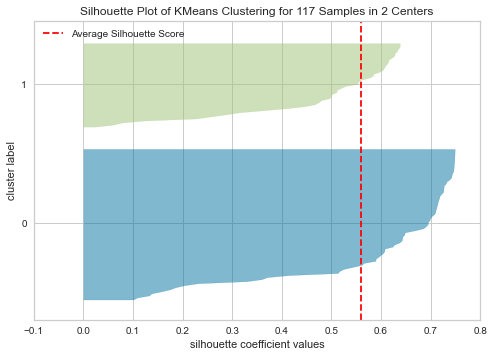

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 117 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [145]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [146]:
score = silhouette_score(data_2,df_2['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.559
